<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Замена-типа-данных-и-обработка-пропусков" data-toc-modified-id="Замена-типа-данных-и-обработка-пропусков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Замена типа данных и обработка пропусков</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

total_images — число фотографий квартиры в объявлении

last_price — цена на момент снятия с публикации

total_area — площадь квартиры в квадратных метрах (м²)

first_day_exposition — дата публикации

rooms — число комнат

ceiling_height — высота потолков (м)

floors_total — всего этажей в доме

living_area — жилая площадь в квадратных метрах (м²)

floor — этаж

is_apartment — апартаменты (булев тип)

studio — квартира-студия (булев тип)

open_plan — свободная планировка (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

balcony — число балконов

locality_name — название населённого пункта

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest — расстояние до центра города (м)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # в начале прописываю все понадобившиеся по ходу работы библиотеки
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
display(df.head())
#выводим первые строки для ознакомления
df.info() #выводим общую информацию о датасете
duplicated_df = df[df.duplicated(keep=False)].head(30)
#проверяем на дубликаты (хотя возможно надо сначала поправить типы данных)дубликатов не обнаруженно
display(duplicated_df) 
display(df.duplicated().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


0

In [2]:
df.info() #выводим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
duplicated_df = df[df.duplicated(keep=False)].head(30)
#проверяем на дубликаты (хотя возможно надо сначала поправить типы данных)дубликатов не обнаруженно
display(duplicated_df) 
display(df.duplicated().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


0

In [4]:
df.groupby('total_area').agg({'rooms': 'count'}).sort_values(by = 'total_area', ascending = True)#подставляю разные столбцы смотрю уникальные значения и т.д.

,rooms
total_area,
12.0,1
13.0,3
13.2,1
14.0,1
15.0,2
...,...
590.0,1
618.0,1
631.0,1


In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод**

В таблице 22 столбца/23698 строки. 
Тип данных в столбцах — bool(2), float64(14), int64(3), object(3)
Проверка на наличие пустых значений  - они есть.
Написание заголовков столбцов не нуждается в правке регистра, пробелы в названиях столбов написаны верно через _
Разное написание содержания внутри столбца locality_name. 
Неадекватные значения в колоках например: 2 метра жилого пространства.
Некоторые столбцы например is_apartment не булев тип по факту, а object.
Дубликатов нет. Далее смотрим типы данных и пустые значения.
Описание данных. 

total_images — число фотографий квартиры в объявлении

last_price — цена на момент снятия с публикации

total_area — площадь квартиры в квадратных метрах (м²)

first_day_exposition — дата публикации

rooms — число комнат

ceiling_height — высота потолков (м)

floors_total — всего этажей в доме

living_area — жилая площадь в квадратных метрах (м²)

floor — этаж

is_apartment — апартаменты (булев тип)

studio — квартира-студия (булев тип)

open_plan — свободная планировка (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

balcony — число балконов

locality_name — название населённого пункта

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest — расстояние до центра города (м)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

## Предобработка данных

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из столбцов в которых пропущены значения в расчетах нам понадобятся: 

living_area              заполнить медианой 

ceiling_height           считаю имеющихся данных достаточно врядли в потолках может быть что- то сверх выдающееся

floors_total               заполним исходя из floor - решим что не указано у тех чьё обьявление на последнем этаже

living_area              заполнить медианой

is_apartment            можно оставить как есть т.к. не участвуют в расчетах

kitchen_area             заполнить медианой 

balcony                 можно оставить как есть т.к. не участвуют в расчетах

locality_name              будем сичтать пропущенно 49 не так много строк теряем

airports_nearest        будем считать что рядом нет аэропорта

cityCenters_nearest     будем считать что рядом нет центра

parks_around3000         можно оставить как есть т.к. не участвуют в расчетах

parks_nearest           можно оставить как есть т.к. не участвуют в расчетах

ponds_around3000        можно оставить как есть т.к. не участвуют в расчетах

ponds_nearest          можно оставить как есть т.к. не участвуют в расчетах

days_exposition          заполним датой последнего (самого свежего) обьявления из этого датасета

## Замена типа данных и обработка пропусков

In [7]:
#df['floors_total'] = df['floors_total'].astype('int64') - чтобы заменить тип данных надо избавиться от NAN
display(df['floors_total'].unique())
filtered_df = df[df['floors_total'].isna()].groupby('floor').agg({'last_price': 'count'}) # вместо last_price может быть любой другой столбец - это просто счетчик строк
display(filtered_df) #смотрим какие этажи попадают в nan
#предположим что последний этаж не указан в квартирах на последнем этаже. заполняем по этой теории пропущенные значения чтобы привести к типу int

display('пропуски до:', df['floors_total'].isna().sum())
df.loc[df['floors_total'].isna(),'floors_total'] = df['floor']
display('пропуски после:', df['floors_total'].isna().sum())

df['floors_total'] = df['floors_total'].astype('int64')
df.info()
#filtered_df = df[df['floors_total'].isnull()] #предположим что для последних этажей не указано общее количество этажей и приравняем floor к floors_total
#display(filtered_df)
#display(((df['floors_total'].value_counts()).sort_values(ascending=False)).head(10))
#display(df['floor'].unique())
#display((df.groupby(['floors_total']).agg({'floor': 'count'}).sort_values(by = 'floors_total', ascending = True)).head(198))

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

,last_price
floor,
1,3
2,2
3,4
4,10
5,4
6,9
7,4
8,8
9,5


'пропуски до:'

86

'пропуски после:'

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


/tmp/ipykernel_285/3835374940.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df['date_time'].describe())


count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: date_time, dtype: object

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

,last_price
date_time,
2014-11-27,3
2014-12-08,1
2014-12-09,7
2014-12-10,3
2014-12-11,2
...,...
2019-04-29,36
2019-04-30,25
2019-05-01,29


(-1.0, 507.0)

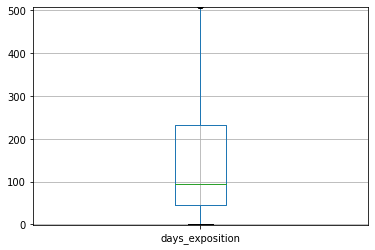

In [8]:
#решим что пропуски в столбце days_exposition — как сказали на консультации надо заменить на разницу дня публикации с самой свежей последней датой в выборке
display(df.head()) 
df['date_time'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#display(df.head())

display(df['date_time'].describe())
display(df['days_exposition'].describe())
display(df[df['days_exposition'].isna()].groupby('date_time').agg({'last_price': 'count'}))
df.boxplot(column='days_exposition')
plt.ylim(-1, 507)


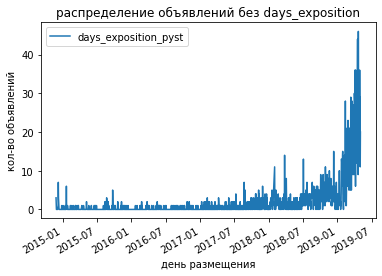

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['days_exposition_pyst'] = df['days_exposition'].isna().astype(int)
df.groupby('first_day_exposition').agg({'days_exposition_pyst': 'sum'}).plot()

plt.xlabel('день размещения'), plt.ylabel('кол-во объявлений')
plt.title('распределение объявлений без days_exposition')
plt.show()

In [10]:

df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

df['year_number'] = df['year']*1
days_exposition_year1 = df.query('days_exposition > 0')
year1 = days_exposition_year1.pivot_table(index = 'year_number', values = 'days_exposition', aggfunc = ['mean', 'count', 'median'])
display(year1)

df['month_number'] = df['month']*1
days_exposition_month1 = df.query('days_exposition > 0')
month1 = days_exposition_month1.pivot_table(index = 'month_number', values = 'days_exposition', aggfunc = ['mean', 'count', 'median'])
display(month1)

,mean,count,median
,days_exposition,days_exposition,days_exposition
year_number,,,
2014,910.983193,119,875.0
2015,648.035682,1121,576.0
2016,320.748159,2716,235.0
2017,158.955929,7919,103.0
2018,94.337963,7560,64.0
2019,30.931671,1083,23.0


,mean,count,median
,days_exposition,days_exposition,days_exposition
month_number,,,
1,186.972115,1291,89.0
2,169.883384,2281,90.0
3,202.972138,1974,109.0
4,199.725246,1525,125.0
5,220.043141,1159,132.0
6,194.636147,1682,114.0
7,174.984801,1579,92.0
8,154.358561,1612,82.0


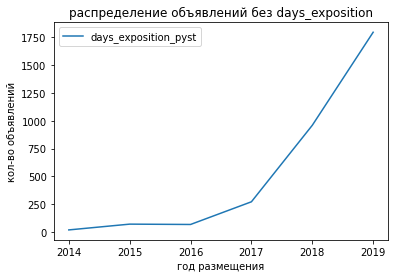

In [11]:
#df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['days_exposition_pyst'] = df['days_exposition'].isna().astype(int)
df.groupby('year_number').agg({'days_exposition_pyst': 'sum'}).plot()

plt.xlabel('год размещения'), plt.ylabel('кол-во объявлений')
plt.title('распределение объявлений без days_exposition')
plt.show()

count    18812.000000
mean       128.005688
std        120.472736
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        506.000000
Name: days_exposition, dtype: float64

(-1.0, 507.0)

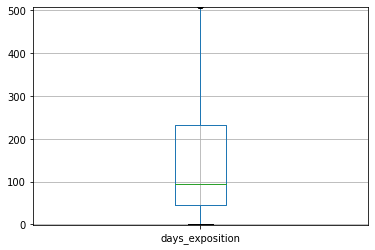

In [12]:
days_exposition_test = df.query('days_exposition >= 0 and days_exposition <= 506')

display(days_exposition_test['days_exposition'].describe())  #медиана снизилась с 95 до 85 после убирания выбросов
df.boxplot(column='days_exposition')
plt.ylim(-1,507)



In [13]:
#display((a = df['first_day_exposition'].max())-(df['first_day_exposition'].min()))
##df['raznica_dat'] = df['date_time'].max()-df['date_time']

##df['raznica_dat2'] = pd.to_numeric(df['raznica_dat'].dt.days, downcast='integer')
#df['raznica_dat'] = df['raznica_dat'].astype('int64')
#display(df.groupby(['days_exposition']).agg({'days_exposition':'sum'}))

display('пропуски до:', df['days_exposition'].isna().sum())
##df.loc[df['days_exposition'].isna(),'days_exposition'] = df['raznica_dat2']
##НЕ ЗАПОЛНЯЕМ ПРОПУСКИdf.loc[df['days_exposition'].isna(),'days_exposition'] = 85 #заполняем на медиану, а не на количество дней от даты последнего самого свежего обьявления
display('пропуски после:', df['days_exposition'].isna().sum())

##НЕ ЗАПОЛНЯЕМ ПРОПУСКИdf['days_exposition'] = df['days_exposition'].astype('int64')
display(df['days_exposition'].describe())
#display(df.groupby(['days_exposition']).agg({'days_exposition':'sum'}))
#решим что пропуски в столбце days_exposition — сколько дней было размещено объявление (от публикации до снятия)
#- значит что квартира еще не продана
#display('пропуски до:', df['days_exposition'].isna().sum())
#df.loc[df['days_exposition'].isna(),'days_exposition'] = 0
#display('пропуски после:', df['days_exposition'].isna().sum())

#df['days_exposition'] = df['days_exposition'].astype('int64')
df.info()

#display(df.groupby('weekday').agg({'date_time': 'count'}).sort_values(by = 'weekday', ascending = True))  #для проверки значений на отсутствие пробелов в периодах
#display(df.groupby('month').agg({'date_time': 'count'}).sort_values(by = 'month', ascending = True))  #для проверки значений на отсутствие пробелов в периодах
#display(df.groupby('year').agg({'date_time': 'count'}).sort_values(by = 'year', ascending = True))  #для проверки значений на отсутствие пробелов в периодах
#df.info() проверка типа знаечний новых столбцов
#data4 = df.pivot_table(index=['year'], aggfunc='count') - для проверки значений 
#display(data4.head(15)) 
#df['Time'] = df['date_time'].dt.time
#data2 = df.pivot_table(index=['Time'], columns='is_apartment', values='last_price', aggfunc='count')
#data2 = df.pivot_table(index=['Time'],aggfunc='count') - время только одно 00:00:00
#display(data2.head()) 

'пропуски до:'

3181

'пропуски после:'

3181

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [14]:
display(df['kitchen_area'].corr(df['total_area']))
display(df['kitchen_area'].corr(df['rooms']))
display(df['kitchen_area'].corr(df['floor']))
display(df['kitchen_area'].corr(df['studio']))

0.6091211711198318

0.2699448541638585

0.1355313696043129

nan

In [15]:
#total_area — площадь квартиры в квадратных метрах (м²)
#kitchen_area — площадь кухни в квадратных метрах (м²) - заполнить nan

df['%_kitchen'] = df['kitchen_area']/df['total_area']
display(df.sort_values(by='%_kitchen', ascending=False))
#display(df.sort_values(by='1m2_price', ascending=False))

#смотрим медиану для заполнения NaN в %_kitchen
medians = (df.groupby(['rooms']).agg({'%_kitchen': 'median'}).rename(columns = {'%_kitchen': 'median_%_kitchen'}))
#medians = (df.groupby(['total_area', 'kitchen_area']).agg({'%_kitchen': 'median'}).rename(columns = {'%_kitchen': 'median_%_kitchen'}))


df = df.merge(medians, on = ['rooms'])

df[['rooms', '%_kitchen' ,'median_%_kitchen']][df['%_kitchen'].isna()].head(5)


df.loc[df['%_kitchen'].isna(), '%_kitchen'] = df.loc[df['%_kitchen'].isna(), 'median_%_kitchen']
#display(df.sort_values(by='%_kitchen', ascending=False))
#display(df.sort_values(by='1m2_price', ascending=False))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,date_time,days_exposition_pyst,month,year,year_number,month_number,%_kitchen
11579,7,4300000.0,33.00,2016-05-13,1,NaN,16,26.00,14,NaN,...,0.0,NaN,180.0,2016-05-13,0,5,2016,2016,5,0.787879
1407,9,3250000.0,24.60,2018-06-29,1,NaN,25,18.00,16,NaN,...,1.0,400.0,96.0,2018-06-29,0,6,2018,2018,6,0.739837
511,7,5950000.0,69.00,2017-12-21,1,NaN,16,13.00,12,NaN,...,NaN,NaN,56.0,2017-12-21,0,12,2017,2017,12,0.724638
7755,1,1811250.0,20.67,2016-03-28,1,2.65,24,14.95,13,NaN,...,NaN,NaN,98.0,2016-03-28,0,3,2016,2016,3,0.723270
12481,8,3000000.0,60.40,2017-10-04,3,2.60,9,NaN,2,NaN,...,NaN,NaN,234.0,2017-10-04,0,10,2017,2017,10,0.715232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.50,2016-09-08,1,2.56,18,19.60,10,False,...,NaN,NaN,627.0,2016-09-08,0,9,2016,2016,9,NaN
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,...,2.0,844.0,59.0,2018-01-12,0,1,2018,2018,1,NaN
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,45.0,2018-02-08,0,2,2018,2018,2,NaN
23679,0,2500000.0,35.00,2017-12-08,1,NaN,9,NaN,4,NaN,...,NaN,NaN,45.0,2017-12-08,0,12,2017,2017,12,NaN


In [16]:
display(df.sort_values(by='%_kitchen', ascending=False))

df.loc[df['%_kitchen'].isna(), '%_kitchen'] = 0
#довносим нули там где площадь кухни ноль
display(df.sort_values(by='%_kitchen', ascending=False))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_time,days_exposition_pyst,month,year,year_number,month_number,%_kitchen,median_%_kitchen
9752,7,4300000.0,33.00,2016-05-13,1,NaN,16,26.00,14,NaN,...,NaN,180.0,2016-05-13,0,5,2016,2016,5,0.787879,0.247839
6271,9,3250000.0,24.60,2018-06-29,1,NaN,25,18.00,16,NaN,...,400.0,96.0,2018-06-29,0,6,2018,2018,6,0.739837,0.247839
5981,7,5950000.0,69.00,2017-12-21,1,NaN,16,13.00,12,NaN,...,NaN,56.0,2017-12-21,0,12,2017,2017,12,0.724638,0.247839
8472,1,1811250.0,20.67,2016-03-28,1,2.65,24,14.95,13,NaN,...,NaN,98.0,2016-03-28,0,3,2016,2016,3,0.723270,0.247839
3082,8,3000000.0,60.40,2017-10-04,3,2.60,9,NaN,2,NaN,...,NaN,234.0,2017-10-04,0,10,2017,2017,10,0.715232,0.128571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23604,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00,16,NaN,...,623.0,14.0,2017-09-01,0,9,2017,2017,9,NaN,NaN
23605,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00,4,NaN,...,NaN,4.0,2017-09-28,0,9,2017,2017,9,NaN,NaN
23606,15,3350000.0,26.00,2018-09-07,0,NaN,19,NaN,8,NaN,...,112.0,31.0,2018-09-07,0,9,2018,2018,9,NaN,NaN
23607,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00,8,NaN,...,NaN,82.0,2017-11-11,0,11,2017,2017,11,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_time,days_exposition_pyst,month,year,year_number,month_number,%_kitchen,median_%_kitchen
9752,7,4300000.0,33.00,2016-05-13,1,NaN,16,26.00,14,NaN,...,NaN,180.0,2016-05-13,0,5,2016,2016,5,0.787879,0.247839
6271,9,3250000.0,24.60,2018-06-29,1,NaN,25,18.00,16,NaN,...,400.0,96.0,2018-06-29,0,6,2018,2018,6,0.739837,0.247839
5981,7,5950000.0,69.00,2017-12-21,1,NaN,16,13.00,12,NaN,...,NaN,56.0,2017-12-21,0,12,2017,2017,12,0.724638,0.247839
8472,1,1811250.0,20.67,2016-03-28,1,2.65,24,14.95,13,NaN,...,NaN,98.0,2016-03-28,0,3,2016,2016,3,0.723270,0.247839
3082,8,3000000.0,60.40,2017-10-04,3,2.60,9,NaN,2,NaN,...,NaN,234.0,2017-10-04,0,10,2017,2017,10,0.715232,0.128571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23569,5,71000000.0,371.00,2018-07-26,0,3.57,7,NaN,6,NaN,...,584.0,90.0,2018-07-26,0,7,2018,2018,7,0.000000,NaN
23570,5,3000000.0,24.00,2019-02-22,0,2.75,10,18.00,8,NaN,...,NaN,12.0,2019-02-22,0,2,2019,2019,2,0.000000,NaN
23571,11,2300000.0,20.00,2017-11-10,0,NaN,10,16.00,1,NaN,...,815.0,35.0,2017-11-10,0,11,2017,2017,11,0.000000,NaN
23572,17,4200000.0,24.60,2018-03-15,0,2.75,16,18.90,9,NaN,...,NaN,75.0,2018-03-15,0,3,2018,2018,3,0.000000,NaN


In [17]:
display(df.groupby(['rooms', 'studio']).agg({'kitchen_area': 'sum', 'last_price': 'count'}))
df[df['%_kitchen'].isna()].groupby('%_kitchen').agg({'last_price': 'count'}) 
display(df[df['kitchen_area'].isna()].groupby('kitchen_area').agg({'last_price': 'count'}))
display(df.query('rooms == 0'))
display(df.query('kitchen_area == 0'))
display(df['kitchen_area'].isna())

#display(df.query('%_kitchen == 0'))
#убеждаемся что нули можно внести, что это не пропущенные значения 

kitchen_area  last_price
rooms studio                          
0     False           0.00          59
      True            0.00         138
1     False       68885.00        8036
      True            0.00          11
2     False       72711.25        7940
3     False       60840.16        5814
4     False       14770.82        1180
5     False        5234.78         326
6     False        2041.73         105
7     False        1143.90          59
8     False         223.80          12
9     False         175.50           8
10    False          68.60           3
11    False          25.20           2
12    False         112.00           1
14    False          42.50           2
15    False         100.00           1
16    False          13.00           1
19    False          27.60           1

,last_price
kitchen_area,


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_time,days_exposition_pyst,month,year,year_number,month_number,%_kitchen,median_%_kitchen
23412,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50,2,NaN,...,NaN,181.0,2017-03-30,0,3,2017,2017,3,0.0,NaN
23413,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00,1,NaN,...,NaN,45.0,2017-09-27,0,9,2017,2017,9,0.0,NaN
23414,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75,4,NaN,...,982.0,64.0,2018-03-12,0,3,2018,2018,3,0.0,NaN
23415,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30,19,NaN,...,593.0,430.0,2017-03-28,0,3,2017,2017,3,0.0,NaN
23416,2,1850000.0,25.00,2019-02-20,0,NaN,10,NaN,7,NaN,...,NaN,29.0,2019-02-20,0,2,2019,2019,2,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23604,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00,16,NaN,...,623.0,14.0,2017-09-01,0,9,2017,2017,9,0.0,NaN
23605,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00,4,NaN,...,NaN,4.0,2017-09-28,0,9,2017,2017,9,0.0,NaN
23606,15,3350000.0,26.00,2018-09-07,0,NaN,19,NaN,8,NaN,...,112.0,31.0,2018-09-07,0,9,2018,2018,9,0.0,NaN
23607,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00,8,NaN,...,NaN,82.0,2017-11-11,0,11,2017,2017,11,0.0,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,date_time,days_exposition_pyst,month,year,year_number,month_number,%_kitchen,median_%_kitchen


0        False
1         True
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: kitchen_area, Length: 23699, dtype: bool

In [18]:
#df['kitchen_area_dybl'] = df['kitchen_area'] #- для просмотра столбцов паралельно
df['kitchen_area_new'] = df['total_area'] * df['%_kitchen']
df['kitchen_area_new'] = round(df['kitchen_area_new'], 1)
display(df)
#исходя из процентовки по доли кухни от всей площади 
#а также дозаполнения медианой значений кухонь ориентируясь на количество комнат
#и после внесения нулей там где они и должны быть считаем сколько должна быть метров кухня там где значения были пропущены
#Для того чтобы найти процент от числа, нужно просто это число умножить на число процентов и разделить на 100%.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,date_time,days_exposition_pyst,month,year,year_number,month_number,%_kitchen,median_%_kitchen,kitchen_area_new
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,NaN,2019-03-07,1,3,2019,2019,3,0.231481,0.128571,25.0
1,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,424.0,2015-07-24,0,7,2015,2015,7,0.128571,0.128571,20.4
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,289.0,2017-02-26,0,2,2017,2017,2,0.106557,0.128571,6.5
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,397.0,2017-11-23,0,11,2017,2017,11,0.109756,0.128571,9.0
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,97.0,2019-01-09,0,1,2019,2019,1,0.099174,0.128571,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,14,29000000.0,292.2,2017-01-12,9,3.35,5,225.9,4,NaN,...,825.0,2017-01-12,0,1,2017,2017,1,0.112594,0.049620,32.9
23695,0,24000000.0,250.0,2019-04-23,9,3.20,5,160.6,3,NaN,...,NaN,2019-04-23,1,4,2019,2019,4,0.046800,0.049620,11.7
23696,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,NaN,...,114.0,2018-06-09,0,6,2018,2018,6,0.073679,0.073679,27.6
23697,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,1365.0,2015-03-02,0,3,2015,2015,3,0.048148,0.048148,13.0


In [19]:
#living_area — жилая площадь в квадратных метрах (м²) - пропущенные
df['%_living_area'] = df['living_area']/df['total_area']
display(df.sort_values(by='%_living_area', ascending=False))

#смотрим медиану для заполнения NaN в %_living_area
medians = (df.groupby(['rooms']).agg({'%_living_area': 'median'}).rename(columns = {'%_living_area': 'median_%_living_area'}))
df = df.merge(medians, on = ['rooms'])
df[['rooms', '%_living_area' ,'median_%_living_area']][df['%_living_area'].isna()].head(5)
df.loc[df['%_living_area'].isna(), '%_living_area'] = df.loc[df['%_living_area'].isna(), 'median_%_living_area']

display(df.sort_values(by='%_living_area', ascending=False))


#df['living_area_dybl'] = df['living_area'] #- для просмотра столбцов паралельно
df['living_area_new'] = df['total_area'] * df['%_living_area']
df['living_area_new'] = round(df['living_area_new'], 1)
#исходя из процентовки по доли ЖИЛОЙ ПЛОЩАДИ от всей площади 
#а также дозаполнения медианой значений ЖИЛОЙ ПЛОЩАДИ ориентируясь на количество комнат
#считаем сколько должна быть метров ЖИЛАЯ ПЛОЩАДЬ там где значения были пропущены
#Для того чтобы найти процент от числа, нужно просто это число умножить на число процентов и разделить на 100%.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,date_time,days_exposition_pyst,month,year,year_number,month_number,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area
23496,10,2350000.0,25.00,2017-12-03,0,NaN,22,25.0,17,NaN,...,2017-12-03,0,12,2017,2017,12,0.000000,NaN,0.0,1.000000
23518,1,3700000.0,24.20,2017-11-10,0,NaN,19,24.2,13,NaN,...,2017-11-10,0,11,2017,2017,11,0.000000,NaN,0.0,1.000000
23504,14,2950000.0,25.27,2017-11-17,0,NaN,25,25.0,11,NaN,...,2017-11-17,0,11,2017,2017,11,0.000000,NaN,0.0,0.989315
23388,5,13351000.0,102.70,2018-07-03,6,3.40,4,101.0,1,NaN,...,2018-07-03,0,7,2018,2018,7,0.099502,0.099502,10.2,0.983447
11057,3,3500000.0,33.82,2014-12-26,1,NaN,27,33.0,15,NaN,...,2014-12-26,0,12,2014,2014,12,0.275577,0.247839,9.3,0.975754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,19,140000000.0,631.00,2019-03-30,7,NaN,5,NaN,5,NaN,...,2019-03-30,1,3,2019,2019,3,0.095087,0.083717,60.0,NaN
23632,0,38000000.0,400.00,2019-03-15,7,3.60,3,NaN,1,NaN,...,2019-03-15,1,3,2019,2019,3,0.083717,0.083717,33.5,NaN
23641,6,32894076.0,364.70,2019-05-02,7,3.32,3,NaN,1,NaN,...,2019-05-02,1,5,2019,2019,5,0.083717,0.083717,30.5,NaN
23650,12,13490000.0,100.60,2018-07-31,7,NaN,4,NaN,2,True,...,2018-07-31,0,7,2018,2018,7,0.083717,0.083717,8.4,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition_pyst,month,year,year_number,month_number,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area
23518,1,3700000.0,24.20,2017-11-10,0,NaN,19,24.2,13,NaN,...,0,11,2017,2017,11,0.000000,NaN,0.0,1.000000,0.689655
23496,10,2350000.0,25.00,2017-12-03,0,NaN,22,25.0,17,NaN,...,0,12,2017,2017,12,0.000000,NaN,0.0,1.000000,0.689655
23504,14,2950000.0,25.27,2017-11-17,0,NaN,25,25.0,11,NaN,...,0,11,2017,2017,11,0.000000,NaN,0.0,0.989315,0.689655
23388,5,13351000.0,102.70,2018-07-03,6,3.4,4,101.0,1,NaN,...,0,7,2018,2018,7,0.099502,0.099502,10.2,0.983447,0.679412
11057,3,3500000.0,33.82,2014-12-26,1,NaN,27,33.0,15,NaN,...,0,12,2014,2014,12,0.275577,0.247839,9.3,0.975754,0.482488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,0,2330000.0,23.00,2018-01-01,0,NaN,24,2.0,22,NaN,...,0,1,2018,2018,1,0.000000,NaN,0.0,0.086957,0.689655
6879,7,4440000.0,41.00,2017-07-02,1,NaN,17,3.0,17,NaN,...,0,7,2017,2017,7,0.268293,0.247839,11.0,0.073171,0.482488
22896,15,6100000.0,77.60,2019-02-28,4,2.5,9,5.4,1,NaN,...,0,2,2019,2019,2,0.126289,0.112245,9.8,0.069588,0.659740
18492,20,6350000.0,52.00,2018-02-06,2,3.0,6,2.0,2,NaN,...,0,2,2018,2018,2,0.173077,0.161075,9.0,0.038462,0.585009


,last_price
floors_total,
1,18
2,169
3,271
4,420
5,2126
6,304
7,198
8,177
9,1209


,last_price
floors_total,
1,28
2,385
3,672
4,1210
5,5792
6,923
7,596
8,398
9,3766


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

(2.1, 3.29)

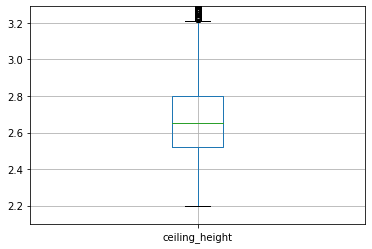

In [20]:
display(df[df['ceiling_height'].isna()].groupby('floors_total').agg({'last_price': 'count'}))
display(df.groupby('floors_total').agg({'last_price': 'count'}))#все этажи

display(df['ceiling_height'].describe())

df.boxplot(column='ceiling_height')
plt.ylim(2.1, 3.29)

                          


count    13673.000000
mean         2.679899
std          0.183950
min          2.200000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.200000
Name: ceiling_height, dtype: float64

(2.1, 3.3)

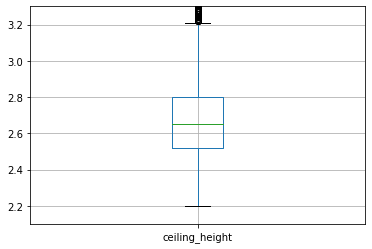

In [21]:
ceiling_height_pysto = df.query('ceiling_height >= 2.2 and ceiling_height <= 3.2')

display(ceiling_height_pysto['ceiling_height'].describe())


df.boxplot(column='ceiling_height')
plt.ylim(2.1,3.3)
#впринцепе от изначальной медианы в 2.65 -> 2.64 отличается не сильно после отсекания выбросов

In [22]:

#medians = (df.groupby(['floors_total']).agg({'ceiling_height': 'median'}).rename(columns = {'ceiling_height': 'median_ceiling_height'}))
#df = df.merge(medians, on = ['floors_total'])
#df[['floors_total', 'ceiling_height' ,'median_ceiling_height']][df['ceiling_height'].isna()].head(5)
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = ceiling_height_pysto['ceiling_height'].median()
display(df[df['ceiling_height'].isna()].groupby('floors_total').agg({'last_price': 'count'}))
#display(df.sort_values(by='ceiling_height', ascending=True))

,last_price
floors_total,


# Расчёты и добавление результатов в таблицу

In [23]:
#цена квадратного метра
#total_area — площадь квартиры в квадратных метрах (м²)
#last_price — цена на момент снятия с публикации
df['1m2_price'] = round(df['last_price'] / df['total_area']).astype('int')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,year_number,month_number,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2019,2019,3,0.231481,0.128571,25.0,0.472222,0.631667,51.0,120370
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,2015,2015,7,0.128571,0.128571,20.4,0.631667,0.631667,100.4,408176
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,2017,2017,2,0.106557,0.128571,6.5,0.714754,0.631667,43.6,88525
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,2017,2017,11,0.109756,0.128571,9.0,0.678049,0.631667,55.6,81707
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,2019,2019,1,0.099174,0.128571,12.0,0.628099,0.631667,76.0,117355


In [24]:
#день недели, месяц и год публикации объявления;
df['weekday'] = df['date_time'].dt.weekday
df['month'] = df['date_time'].dt.month #добавлено ранее
df['year'] = df['date_time'].dt.year #добавлено ранее
display(df.head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year_number,month_number,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2019,3,0.231481,0.128571,25.0,0.472222,0.631667,51.0,120370,3
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,2015,7,0.128571,0.128571,20.4,0.631667,0.631667,100.4,408176,4
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,2017,2,0.106557,0.128571,6.5,0.714754,0.631667,43.6,88525,6
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,2017,11,0.109756,0.128571,9.0,0.678049,0.631667,55.6,81707,3
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,2019,1,0.099174,0.128571,12.0,0.628099,0.631667,76.0,117355,2


In [25]:
#этаж квартиры; варианты — первый, последний, другой; - присвоим категории
#floor — этаж
#floors_total — всего этажей в доме

def floor_kategory_schet(row):

    
    income = row['floors_total']- row['floor']
    if income == 0:
        return 'последний этаж'  
    income2 = row['floor']
    if income2 == 1:
        return 'первый этаж'
    return 'иное'
        


df['floor_kategory'] = df.apply(floor_kategory_schet, axis=1)
display(df['floor_kategory'].value_counts()) 
display(df.head(15))



display(df.query('floor == 1'))# проверка срабатывания этажа
display(df.query('floor_kategory == ["последний этаж"]'))# проверка срабатывания этажа

иное              17363
последний этаж     3447
первый этаж        2889
Name: floor_kategory, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,month_number,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,3,0.231481,0.128571,25.0,0.472222,0.631667,51.0,120370,3,иное
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,7,0.128571,0.128571,20.4,0.631667,0.631667,100.4,408176,4,иное
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,2,0.106557,0.128571,6.5,0.714754,0.631667,43.6,88525,6,иное
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,11,0.109756,0.128571,9.0,0.678049,0.631667,55.6,81707,3,первый этаж
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,1,0.099174,0.128571,12.0,0.628099,0.631667,76.0,117355,2,иное
5,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,...,9,0.150000,0.128571,12.0,0.600000,0.631667,48.0,76500,3,иное
6,20,7100000.0,70.0,2017-05-12,3,2.60,17,49.0,11,NaN,...,5,0.131429,0.128571,9.2,0.700000,0.631667,49.0,101429,4,иное
7,9,8600000.0,100.0,2016-04-09,3,2.64,19,52.0,15,False,...,4,0.110000,0.128571,11.0,0.520000,0.631667,52.0,86000,5,иное
8,7,4990000.0,60.0,2016-05-22,3,2.64,5,39.0,4,NaN,...,5,0.100000,0.128571,6.0,0.650000,0.631667,39.0,83167,6,иное
9,16,7900000.0,74.0,2016-05-04,3,2.64,14,59.0,8,False,...,5,0.162162,0.128571,12.0,0.797297,0.631667,59.0,106757,2,иное


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,month_number,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,11,0.109756,0.128571,9.0,0.678049,0.631667,55.6,81707,3,первый этаж
15,11,4150000.0,74.0,2017-08-04,3,2.80,5,44.0,1,NaN,...,8,0.108108,0.128571,8.0,0.594595,0.631667,44.0,56081,4,первый этаж
17,10,4750000.0,73.8,2016-03-14,3,2.64,10,44.8,1,False,...,3,0.140921,0.128571,10.4,0.607046,0.631667,44.8,64363,0,первый этаж
18,12,2800000.0,55.1,2016-05-14,3,2.60,5,38.4,1,NaN,...,5,0.088929,0.128571,4.9,0.696915,0.631667,38.4,50817,5,первый этаж
19,7,4300000.0,62.1,2016-03-13,3,2.55,5,43.5,1,False,...,3,0.117552,0.128571,7.3,0.700483,0.631667,43.5,69243,6,первый этаж
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23671,13,22190000.0,191.2,2017-12-05,8,2.90,6,115.8,1,NaN,...,12,0.026151,0.109170,5.0,0.605649,0.688475,115.8,116056,1,первый этаж
23673,5,16100000.0,150.0,2018-07-10,8,2.92,5,107.0,1,NaN,...,7,0.048000,0.109170,7.2,0.713333,0.688475,107.0,107333,1,первый этаж
23674,13,36900000.0,347.5,2017-09-14,8,2.64,4,160.0,1,NaN,...,9,0.115108,0.109170,40.0,0.460432,0.688475,160.0,106187,3,первый этаж
23688,14,49968900.0,398.0,2017-07-12,9,3.00,2,160.1,1,False,...,7,0.103015,0.049620,41.0,0.402261,0.628251,160.1,125550,2,первый этаж


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,month_number,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory
20,12,2590000.0,55.7,2017-12-18,3,2.50,4,42.6,4,NaN,...,12,0.125673,0.128571,7.0,0.764811,0.631667,42.6,46499,0,последний этаж
28,8,5750000.0,78.0,2016-05-19,3,2.64,27,45.4,27,NaN,...,5,0.138462,0.128571,10.8,0.582051,0.631667,45.4,73718,3,последний этаж
29,18,10999000.0,97.2,2017-11-13,3,2.50,16,NaN,16,NaN,...,11,0.188272,0.128571,18.3,0.631667,0.631667,61.4,113158,0,последний этаж
39,14,7050000.0,66.0,2017-09-04,3,3.00,4,37.8,4,False,...,9,0.166667,0.128571,11.0,0.572727,0.631667,37.8,106818,0,последний этаж
40,2,5600000.0,66.0,2018-07-11,3,2.50,9,48.0,9,NaN,...,7,0.095455,0.128571,6.3,0.727273,0.631667,48.0,84848,2,последний этаж
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,11,40000000.0,290.0,2016-06-21,10,3.50,6,189.4,6,NaN,...,6,0.103448,0.091624,30.0,0.653103,0.653103,189.4,137931,1,последний этаж
23691,0,22250000.0,249.9,2019-04-23,9,3.20,5,157.0,5,NaN,...,4,0.049620,0.049620,12.4,0.628251,0.628251,157.0,89036,1,последний этаж
23692,14,19500000.0,309.7,2016-02-03,9,2.64,5,199.0,5,NaN,...,2,0.046174,0.049620,14.3,0.642557,0.628251,199.0,62964,2,последний этаж
23697,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,3,0.048148,0.048148,13.0,0.666667,0.666667,180.0,105556,0,последний этаж


In [26]:
#а также отношение площади кухни к общей.
#total_area — площадь квартиры в квадратных метрах (м²)
#kitchen_area — площадь кухни в квадратных метрах (м²) - заполнить nan
df['sootnos_kitchen_area'] = df['kitchen_area_new']/df['total_area']
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,%_kitchen,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,0.231481,0.128571,25.0,0.472222,0.631667,51.0,120370,3,иное,0.231481
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,0.128571,0.128571,20.4,0.631667,0.631667,100.4,408176,4,иное,0.128302
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,0.106557,0.128571,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,0.109756,0.128571,9.0,0.678049,0.631667,55.6,81707,3,первый этаж,0.109756
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,0.099174,0.128571,12.0,0.628099,0.631667,76.0,117355,2,иное,0.099174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,14,29000000.0,292.2,2017-01-12,9,3.35,5,225.9,4,NaN,...,0.112594,0.049620,32.9,0.773101,0.628251,225.9,99247,3,иное,0.112594
23695,0,24000000.0,250.0,2019-04-23,9,3.20,5,160.6,3,NaN,...,0.046800,0.049620,11.7,0.642400,0.628251,160.6,96000,1,иное,0.046800
23696,6,32250000.0,374.6,2018-06-09,19,2.64,5,264.5,2,NaN,...,0.073679,0.073679,27.6,0.706086,0.706086,264.5,86092,5,иное,0.073679
23697,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,0.048148,0.048148,13.0,0.666667,0.666667,180.0,105556,0,последний этаж,0.048148


In [27]:
#соотношение жилой и общей площади,

#total_area — площадь квартиры в квадратных метрах (м²) - все данные
#living_area — жилая площадь в квадратных метрах (м²) - пропущенные
#по аналогии с площадью кухни

df['sootnos_living_area'] = df['living_area_new']/df['total_area']
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,median_%_kitchen,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,0.128571,25.0,0.472222,0.631667,51.0,120370,3,иное,0.231481,0.472222
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,0.128571,20.4,0.631667,0.631667,100.4,408176,4,иное,0.128302,0.631447
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,0.128571,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557,0.714754
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,0.128571,9.0,0.678049,0.631667,55.6,81707,3,первый этаж,0.109756,0.678049
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,0.128571,12.0,0.628099,0.631667,76.0,117355,2,иное,0.099174,0.628099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,14,29000000.0,292.2,2017-01-12,9,3.35,5,225.9,4,NaN,...,0.049620,32.9,0.773101,0.628251,225.9,99247,3,иное,0.112594,0.773101
23695,0,24000000.0,250.0,2019-04-23,9,3.20,5,160.6,3,NaN,...,0.049620,11.7,0.642400,0.628251,160.6,96000,1,иное,0.046800,0.642400
23696,6,32250000.0,374.6,2018-06-09,19,2.64,5,264.5,2,NaN,...,0.073679,27.6,0.706086,0.706086,264.5,86092,5,иное,0.073679,0.706086
23697,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,0.048148,13.0,0.666667,0.666667,180.0,105556,0,последний этаж,0.048148,0.666667


## Исследовательский анализ данных

изучить следующие параметры: площадь, цена, число комнат, высота потолков
построить гистограммы для каждого параметра

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

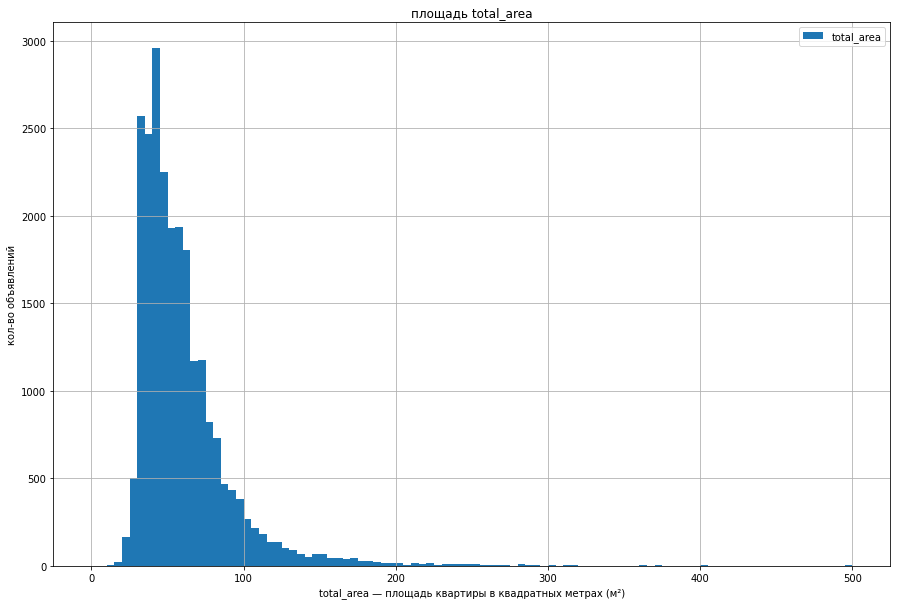

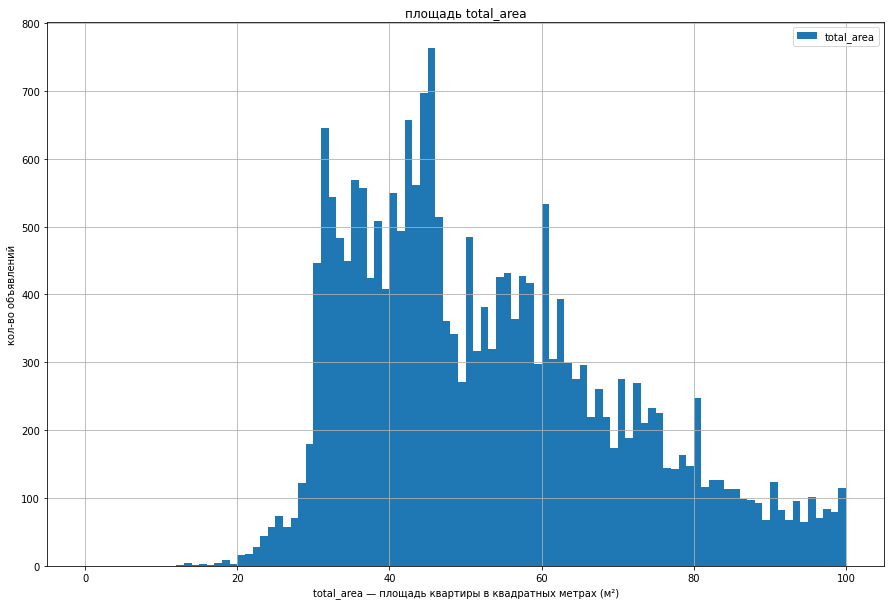

In [28]:
#площадь total_area
display(df['total_area'].describe())

df.plot(kind = 'hist',y = 'total_area', bins = 100, grid=True, range = (0,500), figsize = (15,10))

plt.xlabel('total_area — площадь квартиры в квадратных метрах (м²)'), plt.ylabel('кол-во объявлений')
plt.title('площадь total_area')
plt.show()
df.plot(kind = 'hist',y = 'total_area', bins = 100, grid=True, range = (0,100), figsize = (15,10))
plt.xlabel('total_area — площадь квартиры в квадратных метрах (м²)'), plt.ylabel('кол-во объявлений')
plt.title('площадь total_area')
plt.show()

**Вывод**

Большая часть квартир от 40 до 50 метров. Смещение среднего к 60 происходит из-за квартир гигантов от 100 метров. Распределение нормальное

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price2, dtype: float64

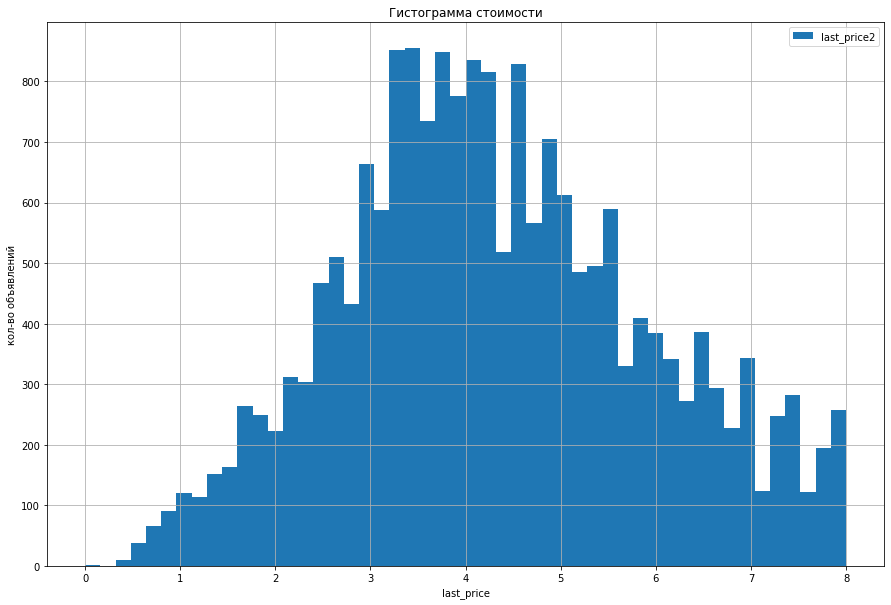

In [29]:
#цена last_price
df['last_price2'] = df['last_price']/1000000
display(df['last_price2'].describe())

df.plot(kind = 'hist',y = 'last_price2', bins = 50, grid=True, range = (0,8), figsize = (15,10)) 
#уменьшила range чтобы рассмотреть основные предложения в 3-5 млн
plt.xlabel('last_price'), plt.ylabel('кол-во объявлений')
plt.title('Гистограмма стоимости')
plt.show()

**Вывод**

Основная масса предложений в районе 3-5 млн рублей

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

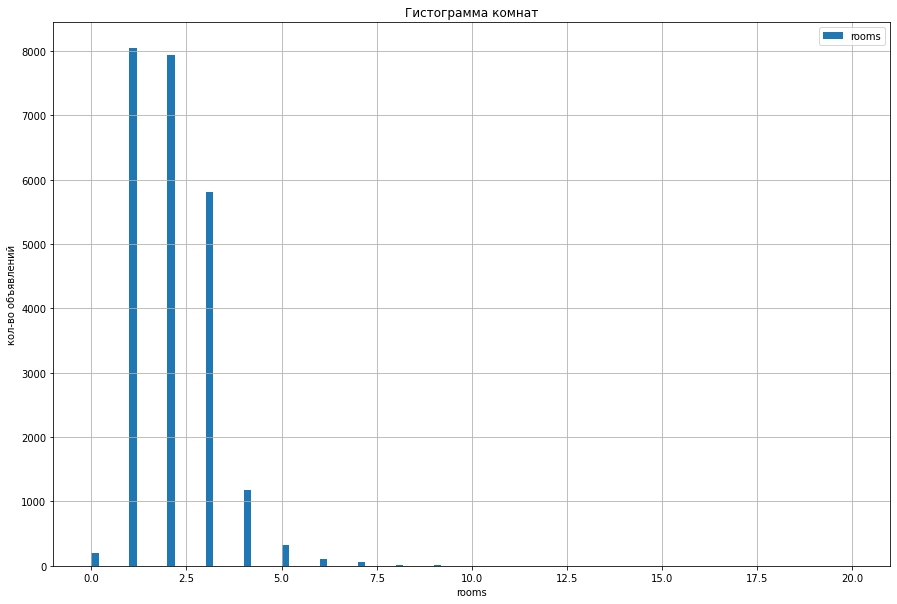

In [30]:
#число комнат rooms
display(df['rooms'].describe())

df.plot(kind = 'hist',y = 'rooms', bins = 100, grid=True, range = (0,20), figsize = (15,10))
plt.xlabel('rooms'), plt.ylabel('кол-во объявлений')
plt.title('Гистограмма комнат')
plt.show()

**Вывод**

Медиана 2 комнаты. Основные предложения 1(наиболее), 2, 3(наименее) комнаты. Распределение нормальное. Есть выбросы в 19 комнат

count    23699.000000
mean         2.720479
std          0.988602
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

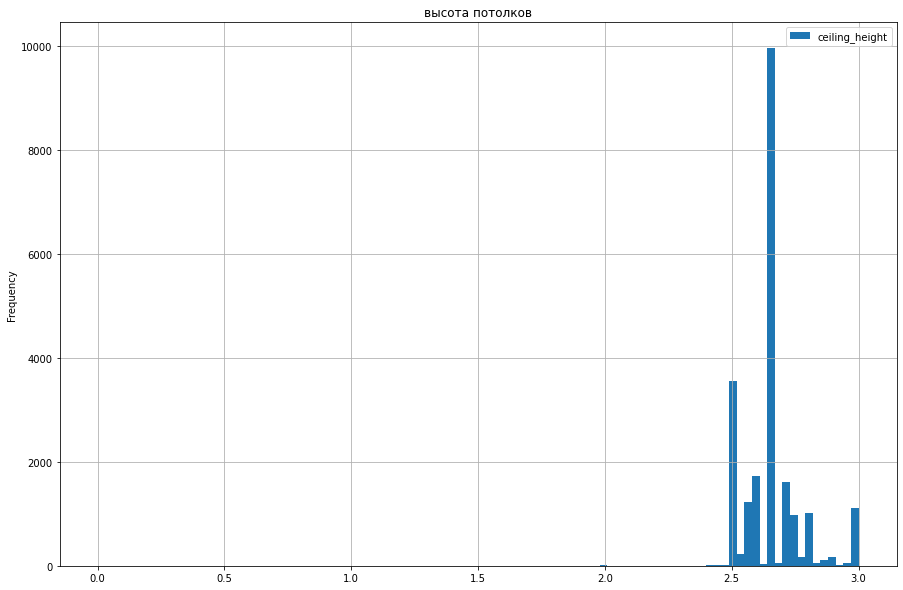

In [31]:
#высота потолков ceiling_height
display(df['ceiling_height'].describe())
#a = df.groupby('ceiling_height').agg({'rooms': 'count'}).sort_values(by = 'ceiling_height', ascending = True)
#display(a == 2,5)
#display(df.query('ceiling_height == 2.5')) #3300 rows × 35 columns


df.plot(kind = 'hist',y = 'ceiling_height', bins = 100, grid=True, range = (0,3), figsize = (15,10), title='высота потолков')


(2.449, 2.859)

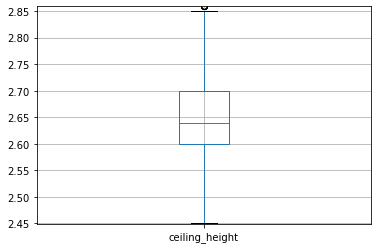

In [32]:
df.boxplot(column='ceiling_height')
plt.ylim(2.449, 2.859)


**Вывод**

После заполнения пропусков основная доля потолков 2.64 см. Есть выбросы за пределами менее 2,45 и более 2,85 

задание: "Изучите время продажи квартиры.

Постройте гистограмму. 
Посчитайте среднее и медиану. 
Опишите, сколько обычно занимает продажа. 
Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
days_exposition — сколько дней было размещено объявление (от публикации до снятия)

900.0
12.0

763.0
0.01219

19
0

100.0
1.0



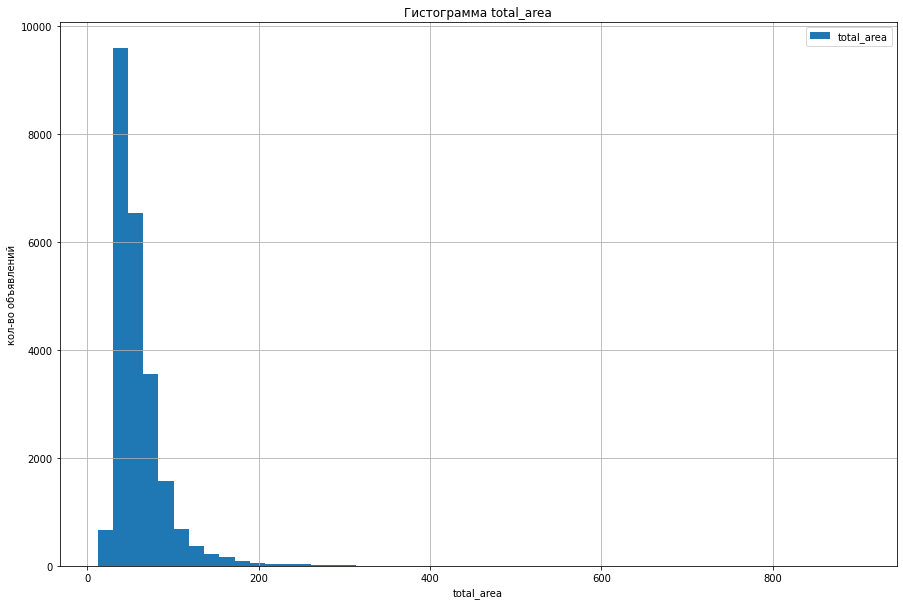

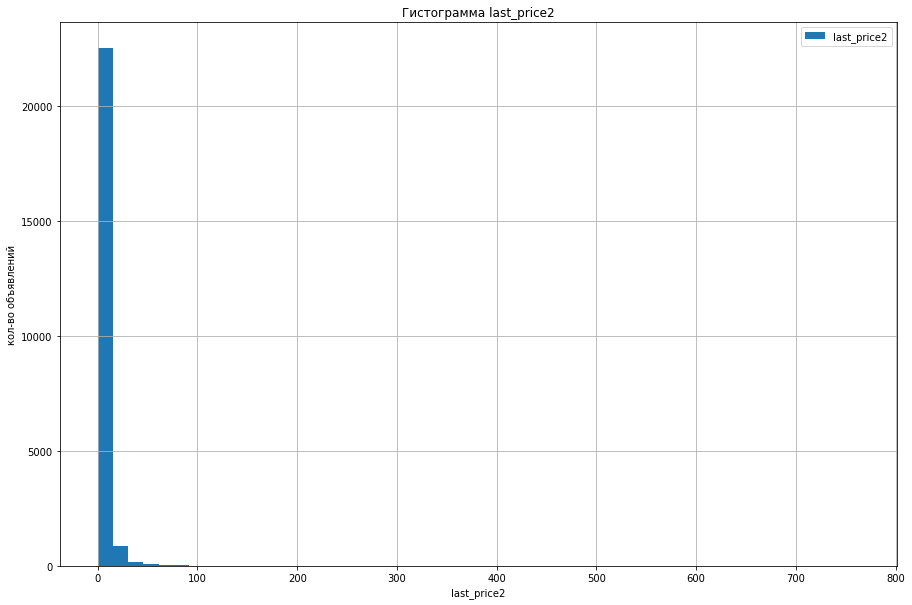

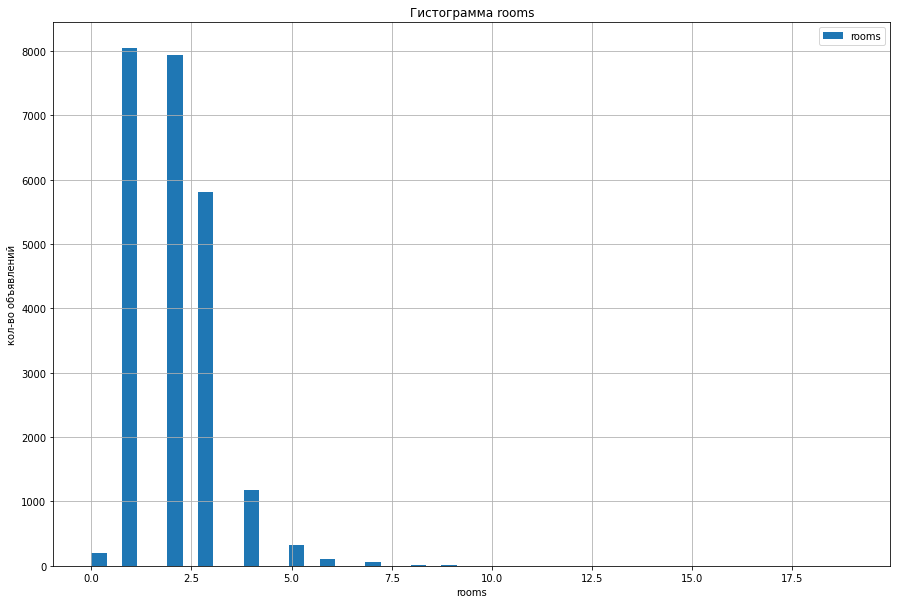

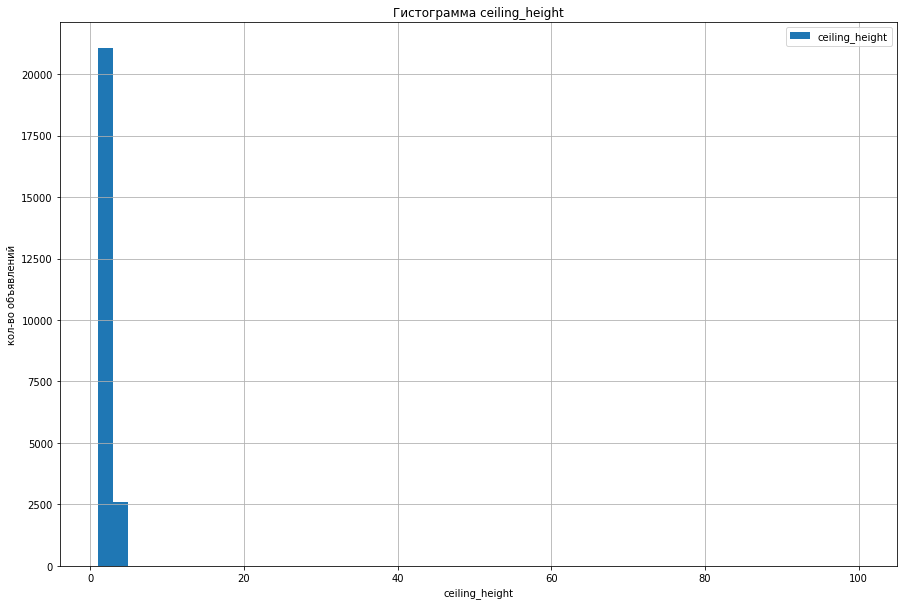

In [33]:

f = ['total_area','last_price2','rooms', 'ceiling_height']
ma = 0
mi = 0
for a in f:
    #st = df[a].std()
    ma = df[a].max()
    mi = df[a].min()
    df.plot(kind = 'hist',y = a, bins = 50, grid=True,range = (mi, ma), figsize = (15,10))
    plt.xlabel(a), plt.ylabel('кол-во объявлений')
    plt.title('Гистограмма ' + a)
    print(ma)
    print(mi)
    #print(st)
    print()
plt.show() 



**Вывод**

До 100 дней сверхбыстрые, от 100 дней до 250 дней в пределах возможного. от 250 до 500 долгие. Если более 500 дней далее можно считать продажу затяжной, а обьявление с низким спросом. Среднее 185 медиана 94

In [34]:
##ЗАКОММЕНТИРУЕМ Т.К. ИСПОЛЬЗУЕМ БЕЗ ФИЛЬТРАЦИИ И БЕЗ ЗАПОЛНЕНИЯ ПРОПУСКОВ df_prodano = df.query('days_exposition > 0') #возьмем только проданные квартиры
##display(df_prodano)
##display(df_prodano['days_exposition'].describe())
display(df)
display(df['days_exposition'].describe())
#df_prodano0 = df.query('days_exposition == 0') #20 строк с нулем дней
#display(df_prodano0.head(50))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area,last_price2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0.472222,0.631667,51.0,120370,3,иное,0.231481,0.472222,13.00
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,20.4,0.631667,0.631667,100.4,408176,4,иное,0.128302,0.631447,64.90
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557,0.714754,5.40
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,9.0,0.678049,0.631667,55.6,81707,3,первый этаж,0.109756,0.678049,6.70
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,12.0,0.628099,0.631667,76.0,117355,2,иное,0.099174,0.628099,14.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,14,29000000.0,292.2,2017-01-12,9,3.35,5,225.9,4,NaN,...,32.9,0.773101,0.628251,225.9,99247,3,иное,0.112594,0.773101,29.00
23695,0,24000000.0,250.0,2019-04-23,9,3.20,5,160.6,3,NaN,...,11.7,0.642400,0.628251,160.6,96000,1,иное,0.046800,0.642400,24.00
23696,6,32250000.0,374.6,2018-06-09,19,2.64,5,264.5,2,NaN,...,27.6,0.706086,0.706086,264.5,86092,5,иное,0.073679,0.706086,32.25
23697,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,13.0,0.666667,0.666667,180.0,105556,0,последний этаж,0.048148,0.666667,28.50


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

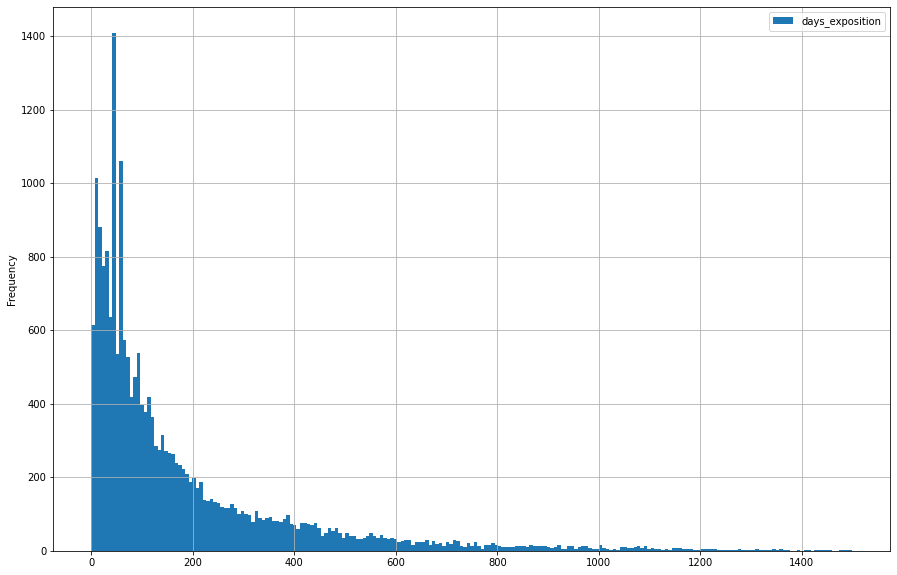

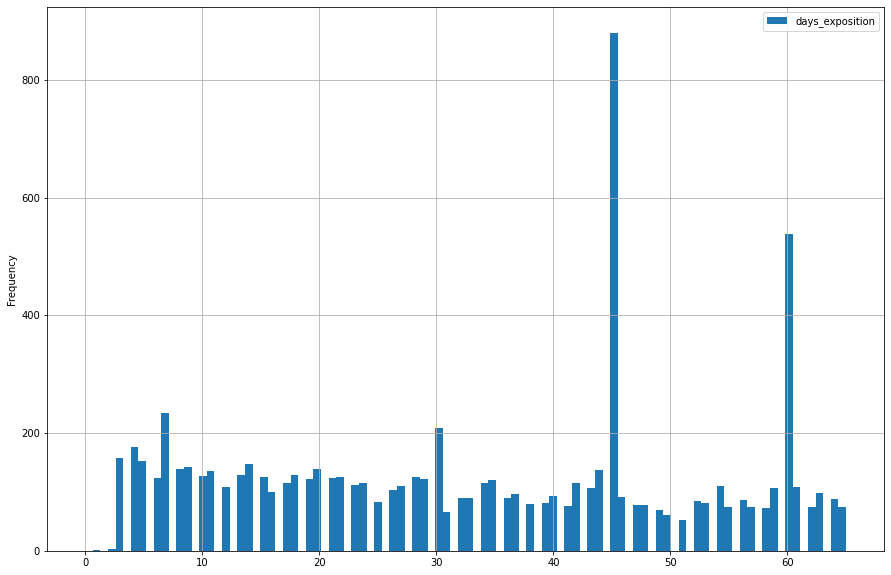

In [35]:
##df_prodano.plot(kind = 'hist',y = 'days_exposition', bins = 100, grid=True, range = (0,1500), figsize = (15,10))
##df_prodano.plot(kind = 'hist',y = 'days_exposition', bins = 100, grid=True, range = (0,65), figsize = (15,10))
df.plot(kind = 'hist',y = 'days_exposition', bins = 219, grid=True, range = (0,1500), figsize = (15,10))
df.plot(kind = 'hist',y = 'days_exposition', bins = 100, grid=True, range = (0,65), figsize = (15,10))

(0.0, 515.0)

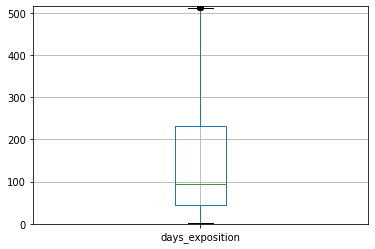

In [36]:
#df_prodano.boxplot(column='days_exposition')
#plt.ylim(80, 100)

df.boxplot(column='days_exposition')
plt.ylim(0, 515)



После возвращения пропусков размах и усы изменились. верхний ус заканчиваеться на 513 вместо  430 .среднее изменилось с 168 на 180 стандартное отклонение с 207 на 219 50% с 85 на 95 75% с 199 на 232


задание: "Уберите редкие и выбивающиеся значения. 
Опишите, какие особенности обнаружили."

**Вывод**

45 и 65 какие то особые сроки или может удаляют обьявление и размещают заново? (чтобы не платить за продление?)

In [37]:
## ЗАПОЛНИМ НОВЫМИ ЗНАЕЧНИЯМИ т.к. не трогали пропуски df_prodano2 = df_prodano.query('days_exposition >= 0 and days_exposition <= 425') 
df_prodano2 = df.query('days_exposition >= 0 and days_exposition <= 512') 
display(df_prodano2)
display(df_prodano2['days_exposition'].describe()) #стандартное отклонение умсеньшилось с 207 до 96

#df_prodano4 =  df_prodano.query('days_exposition not in [45, 60]')
#display(df_prodano4)
#display(df_prodano4['days_exposition'].describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area,last_price2
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,20.4,0.631667,0.631667,100.4,408176,4,иное,0.128302,0.631447,64.9000
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557,0.714754,5.4000
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,9.0,0.678049,0.631667,55.6,81707,3,первый этаж,0.109756,0.678049,6.7000
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,12.0,0.628099,0.631667,76.0,117355,2,иное,0.099174,0.628099,14.2000
5,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,...,12.0,0.600000,0.631667,48.0,76500,3,иное,0.150000,0.600000,6.1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,14,49968900.0,398.0,2017-07-12,9,3.00,2,160.1,1,False,...,41.0,0.402261,0.628251,160.1,125550,2,первый этаж,0.103015,0.402261,49.9689
23689,12,17000000.0,235.0,2018-07-14,9,3.00,6,NaN,3,NaN,...,11.7,0.628251,0.628251,147.6,72340,5,иное,0.049787,0.628085,17.0000
23692,14,19500000.0,309.7,2016-02-03,9,2.64,5,199.0,5,NaN,...,14.3,0.642557,0.628251,199.0,62964,2,последний этаж,0.046174,0.642557,19.5000
23696,6,32250000.0,374.6,2018-06-09,19,2.64,5,264.5,2,NaN,...,27.6,0.706086,0.706086,264.5,86092,5,иное,0.073679,0.706086,32.2500


count    18849.000000
mean       128.753886
std        121.531193
min          1.000000
25%         41.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

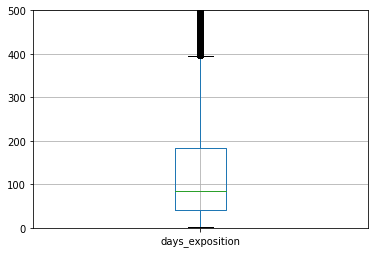

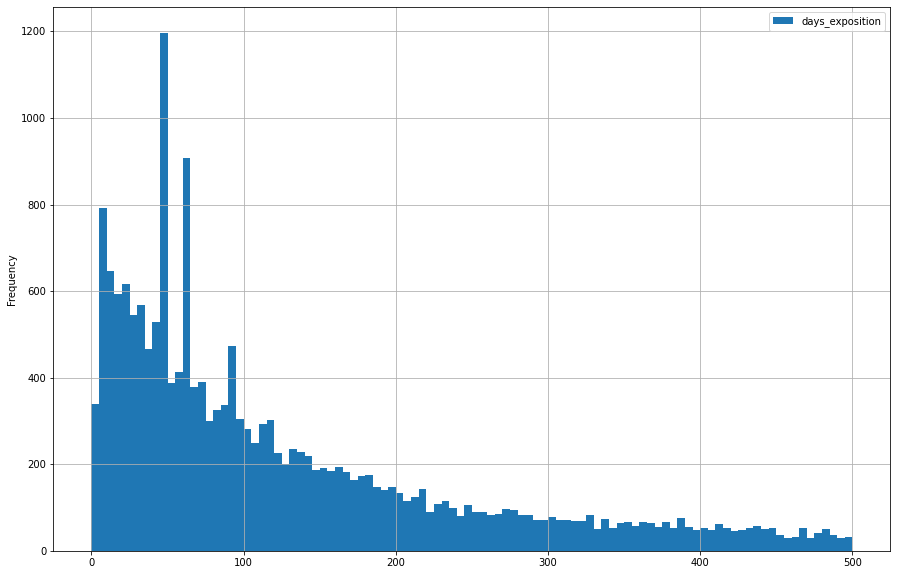

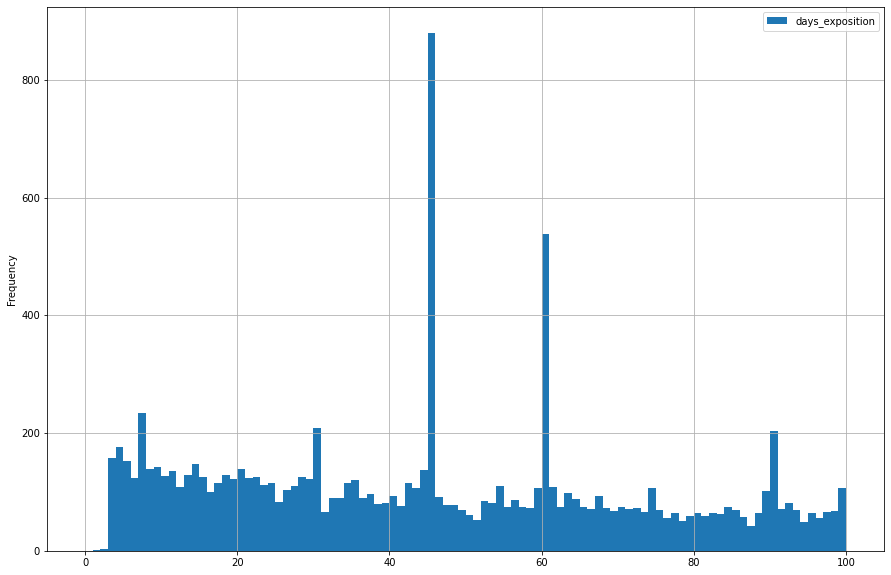

In [38]:
df_prodano2.boxplot(column='days_exposition')
plt.ylim(0, 500)

df_prodano2.plot(kind = 'hist',y = 'days_exposition', bins = 100, grid=True, range = (0,500), figsize = (15,10))
df_prodano2.plot(kind = 'hist',y = 'days_exposition', bins = 100, grid=True, range = (0,100), figsize = (15,10))

In [39]:
#отсекать не надо
#df_prodano2 = df_prodano.query('days_exposition != [45, 60]') 
#display(df_prodano2)
#display(df_prodano2['days_exposition'].describe())

#df_prodano4 =  df_prodano.query('days_exposition not in [45, 60]')
#display(df_prodano4)
#display(df_prodano4['days_exposition'].describe())

In [40]:
#не актуально
#до того как пропущенные значения продолжительности публикации были заменены на raznica_dat2 -  7 дней и 30 не выбивались из графика - убрем и их т.к. они результат замены пропущенных данных

In [41]:
#не применяем
#df_prodano3 = df_prodano.query('days_exposition != [45, 60, 7, 30]') 
#display(df_prodano3)
#display(df_prodano3['days_exposition'].describe())
#df_prodano3.plot(kind = 'hist',y = 'days_exposition', bins = 100, grid=True, range = (0,70), figsize = (15,10))

**Вывод** 

In [42]:
#не актуально
#Среднее было 185 стало 198 медиана была 94 стала 111. Значит сдвиг понятий быстрых и затяжных продаж у нас в плюс
#До 111 дней сверхбыстрые, от 111 дней до 260 дней в пределах возможного. от 260 до 590 долгие. Если более 600 дней далее можно считать продажу затяжной, а обьявление с низким спросом. 


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

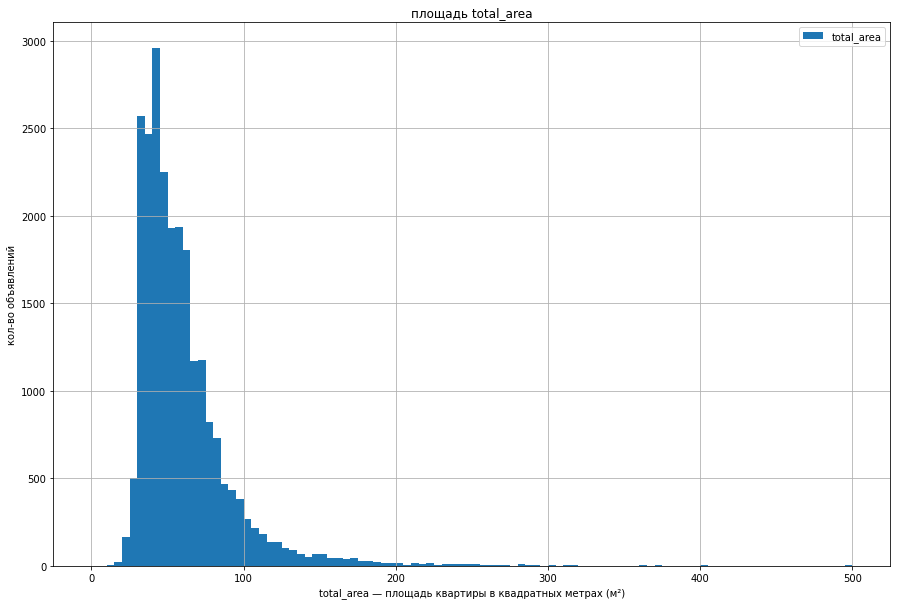

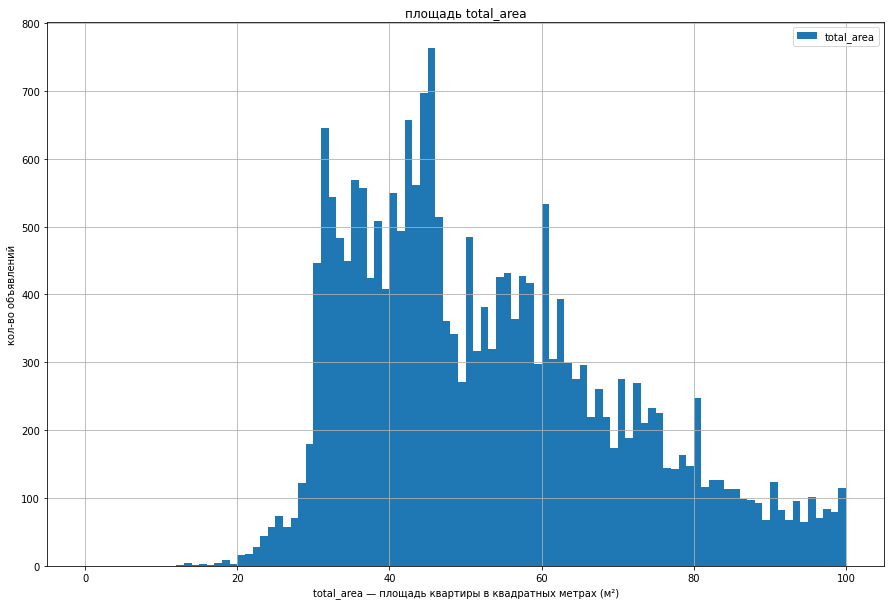

In [43]:
#2площадь total_area
display(df['total_area'].describe())

df.plot(kind = 'hist',y = 'total_area', bins = 100, grid=True, range = (0,500), figsize = (15,10))

plt.xlabel('total_area — площадь квартиры в квадратных метрах (м²)'), plt.ylabel('кол-во объявлений')
plt.title('площадь total_area')
plt.show()
df.plot(kind = 'hist',y = 'total_area', bins = 100, grid=True, range = (0,100), figsize = (15,10))
plt.xlabel('total_area — площадь квартиры в квадратных метрах (м²)'), plt.ylabel('кол-во объявлений')
plt.title('площадь total_area')
plt.show()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

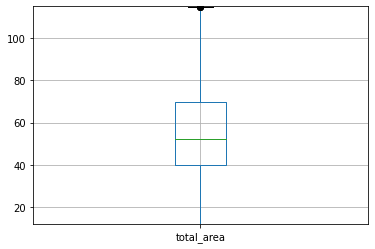

In [44]:
df.boxplot(column='total_area')
plt.ylim(12,115 ) #12/115

display(df['total_area'].describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area,last_price2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0.472222,0.631667,51.0,120370,3,иное,0.231481,0.472222,13.00
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557,0.714754,5.40
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,9.0,0.678049,0.631667,55.6,81707,3,первый этаж,0.109756,0.678049,6.70
5,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,...,12.0,0.600000,0.631667,48.0,76500,3,иное,0.150000,0.600000,6.12
6,20,7100000.0,70.0,2017-05-12,3,2.60,17,49.0,11,NaN,...,9.2,0.700000,0.631667,49.0,101429,4,иное,0.131429,0.700000,7.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23605,0,2500000.0,27.7,2017-09-28,0,2.64,24,18.0,4,NaN,...,0.0,0.649819,0.689655,18.0,90253,3,иное,0.000000,0.649819,2.50
23606,15,3350000.0,26.0,2018-09-07,0,2.64,19,NaN,8,NaN,...,0.0,0.689655,0.689655,17.9,128846,4,иное,0.000000,0.688462,3.35
23607,10,1450000.0,29.0,2017-11-11,0,2.64,9,18.0,8,NaN,...,0.0,0.620690,0.689655,18.0,50000,5,иное,0.000000,0.620690,1.45
23608,8,2350000.0,26.0,2018-06-26,0,2.64,25,17.0,4,NaN,...,0.0,0.653846,0.689655,17.0,90385,1,иное,0.000000,0.653846,2.35


count    22482.000000
mean        54.426912
std         19.472051
min         12.000000
25%         39.400000
50%         50.200000
75%         65.700000
max        115.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

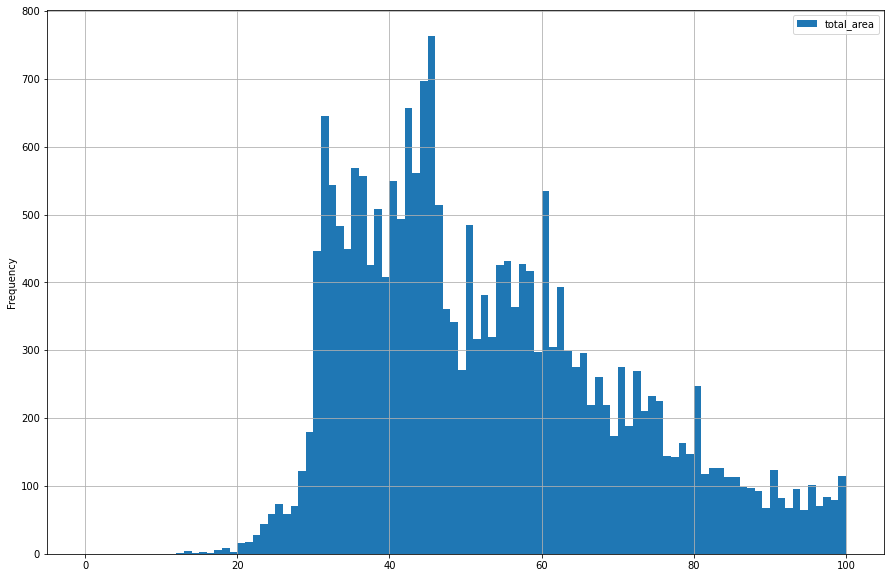

In [45]:
df_total_area = df.query('total_area >= 12 and total_area <= 115') 
display(df_total_area)
display(df_total_area['total_area'].describe())
df_total_area.plot(kind = 'hist',y = 'total_area',bins = 100, grid=True, range = (0,100), figsize = (15,10))

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price2, dtype: float64

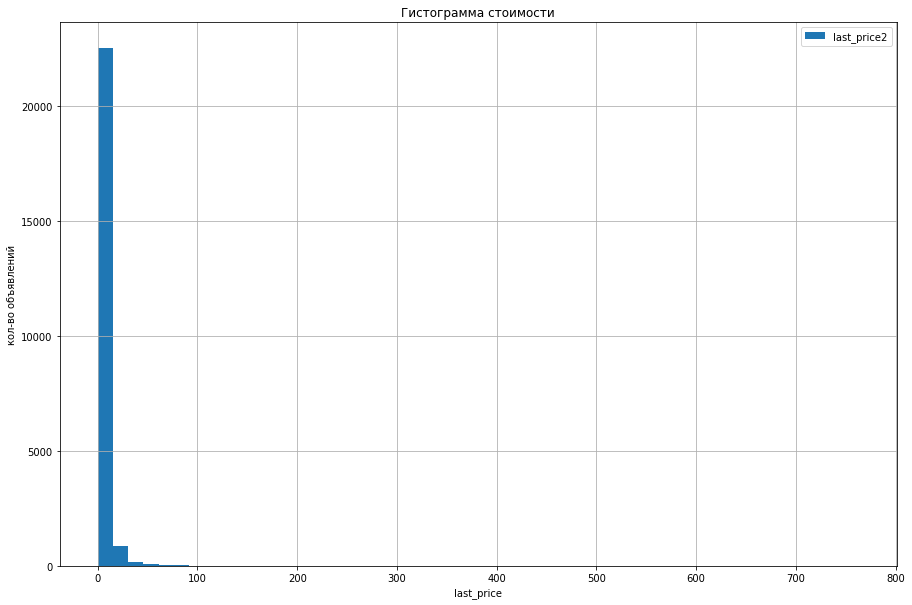

In [46]:
#2цена last_price
df['last_price2'] = df['last_price']/1000000
display(df['last_price2'].describe())

df.plot(kind = 'hist',y = 'last_price2', bins = 50, grid=True, range = (0,763), figsize = (15,10)) 
#уменьшила range чтобы рассмотреть основные предложения в 3-5 млн
plt.xlabel('last_price'), plt.ylabel('кол-во объявлений')
plt.title('Гистограмма стоимости')
plt.show()


count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price2, dtype: float64

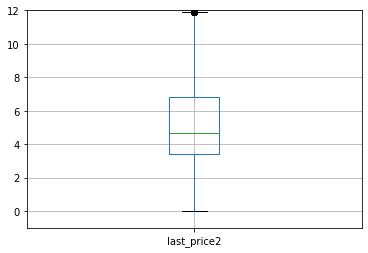

In [47]:
df.boxplot(column='last_price2')
plt.ylim(-1, 12)


display(df['last_price2'].describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area,last_price2
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557,0.714754,5.40
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,9.0,0.678049,0.631667,55.6,81707,3,первый этаж,0.109756,0.678049,6.70
5,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,...,12.0,0.600000,0.631667,48.0,76500,3,иное,0.150000,0.600000,6.12
6,20,7100000.0,70.0,2017-05-12,3,2.60,17,49.0,11,NaN,...,9.2,0.700000,0.631667,49.0,101429,4,иное,0.131429,0.700000,7.10
7,9,8600000.0,100.0,2016-04-09,3,2.64,19,52.0,15,False,...,11.0,0.520000,0.631667,52.0,86000,5,иное,0.110000,0.520000,8.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23606,15,3350000.0,26.0,2018-09-07,0,2.64,19,NaN,8,NaN,...,0.0,0.689655,0.689655,17.9,128846,4,иное,0.000000,0.688462,3.35
23607,10,1450000.0,29.0,2017-11-11,0,2.64,9,18.0,8,NaN,...,0.0,0.620690,0.689655,18.0,50000,5,иное,0.000000,0.620690,1.45
23608,8,2350000.0,26.0,2018-06-26,0,2.64,25,17.0,4,NaN,...,0.0,0.653846,0.689655,17.0,90385,1,иное,0.000000,0.653846,2.35
23619,18,7900000.0,201.5,2018-08-17,7,2.64,2,NaN,2,NaN,...,16.9,0.681670,0.681670,137.4,39206,4,последний этаж,0.083871,0.681886,7.90


count    21758.000000
mean         4.879302
std          2.273424
min          0.012190
25%          3.300000
50%          4.411047
75%          6.000000
max         12.000000
Name: last_price2, dtype: float64

<AxesSubplot:title={'center':'last_price2'}, ylabel='Frequency'>

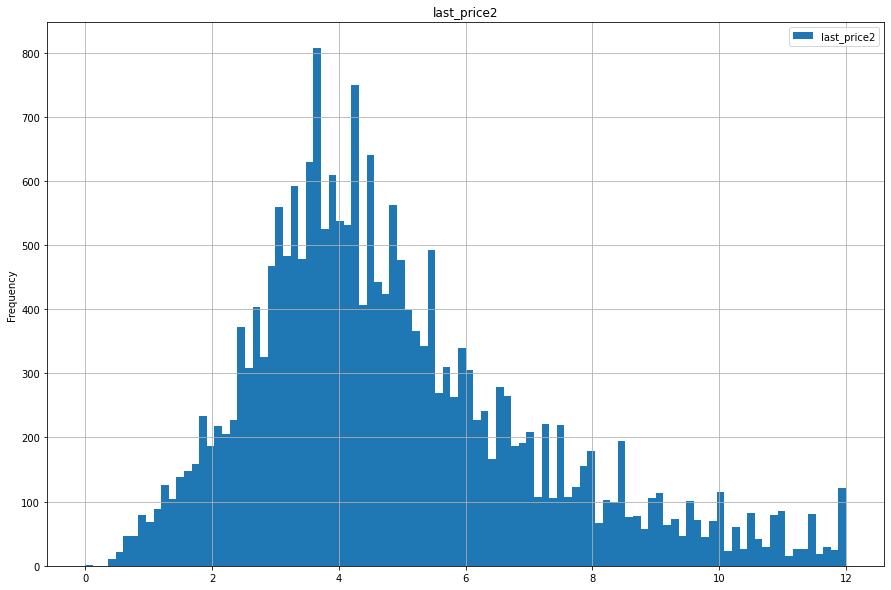

In [48]:
df_last_price2 = df.query('last_price2 >= 0 and last_price2 <= 12') 
display(df_last_price2)
display(df_last_price2['last_price2'].describe())
df_last_price2.plot(kind = 'hist',y = 'last_price2', bins = 100, grid=True, range = (0,12), figsize = (15,10), title='last_price2')

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

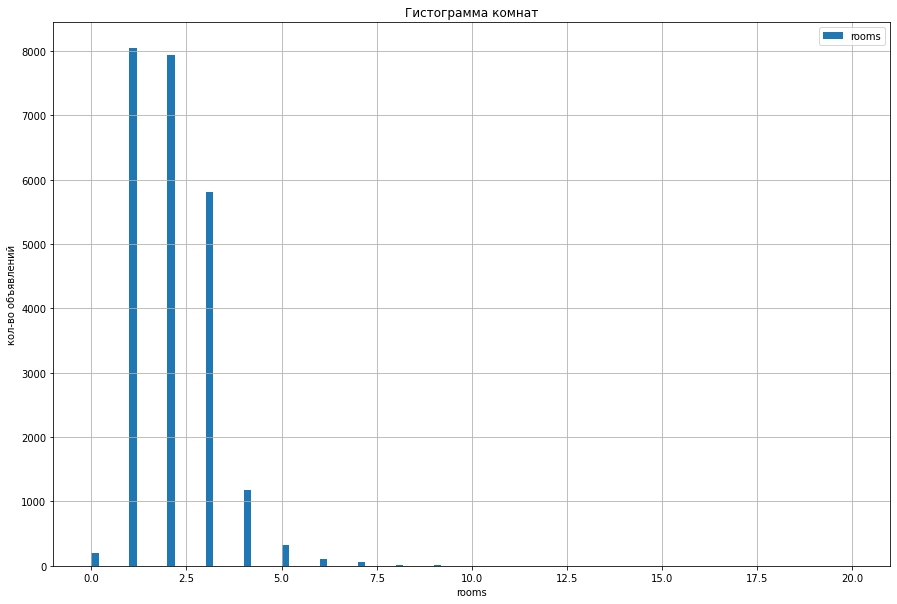

In [49]:
#2число комнат rooms
display(df['rooms'].describe())

df.plot(kind = 'hist',y = 'rooms', bins = 100, grid=True, range = (0,20), figsize = (15,10))
plt.xlabel('rooms'), plt.ylabel('кол-во объявлений')
plt.title('Гистограмма комнат')
plt.show()


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

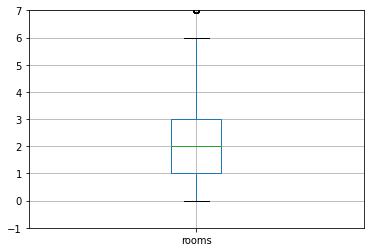

In [50]:
df.boxplot(column='rooms')
plt.ylim(-1, 7)


display(df['rooms'].describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area,last_price2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0.472222,0.631667,51.0,120370,3,иное,0.231481,0.472222,13.00
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,20.4,0.631667,0.631667,100.4,408176,4,иное,0.128302,0.631447,64.90
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557,0.714754,5.40
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,9.0,0.678049,0.631667,55.6,81707,3,первый этаж,0.109756,0.678049,6.70
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,12.0,0.628099,0.631667,76.0,117355,2,иное,0.099174,0.628099,14.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23604,7,3200000.0,26.0,2017-09-01,0,2.64,25,18.0,16,NaN,...,0.0,0.692308,0.689655,18.0,123077,4,иное,0.000000,0.692308,3.20
23605,0,2500000.0,27.7,2017-09-28,0,2.64,24,18.0,4,NaN,...,0.0,0.649819,0.689655,18.0,90253,3,иное,0.000000,0.649819,2.50
23606,15,3350000.0,26.0,2018-09-07,0,2.64,19,NaN,8,NaN,...,0.0,0.689655,0.689655,17.9,128846,4,иное,0.000000,0.688462,3.35
23607,10,1450000.0,29.0,2017-11-11,0,2.64,9,18.0,8,NaN,...,0.0,0.620690,0.689655,18.0,50000,5,иное,0.000000,0.620690,1.45


count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'rooms'}, ylabel='Frequency'>

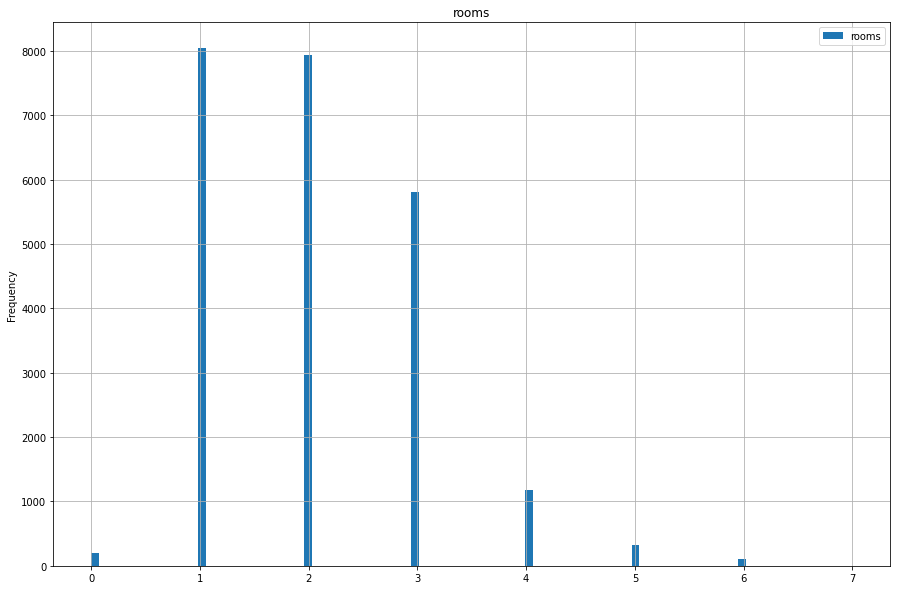

In [51]:
df_rooms = df.query('rooms >= 0 and rooms <= 6') 
display(df_rooms)
display(df_rooms['rooms'].describe())
df_rooms.plot(kind = 'hist',y = 'rooms', bins = 100, grid=True, range = (0,7), figsize = (15,10), title='rooms')

count    23699.000000
mean         2.720479
std          0.988602
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

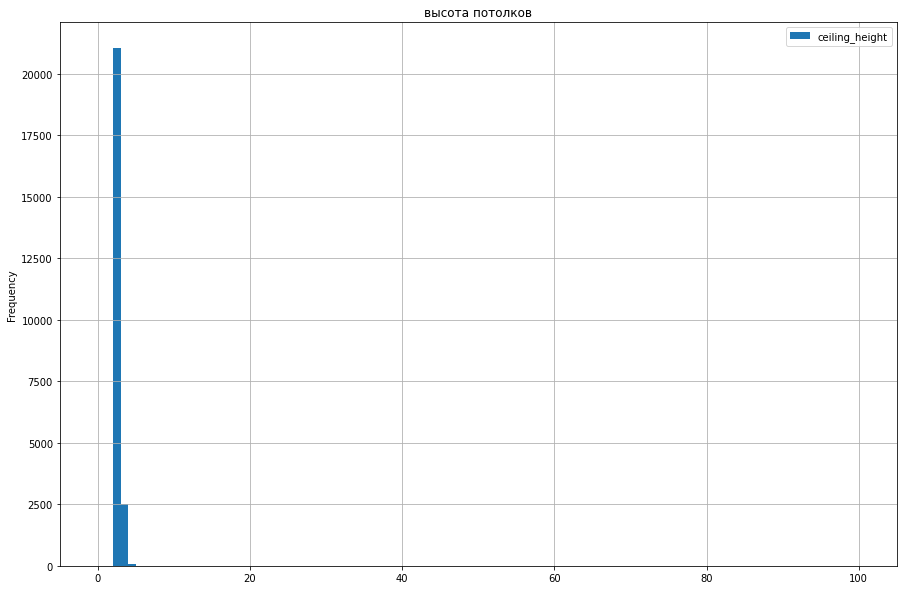

In [52]:
#2высота потолков ceiling_height
display(df['ceiling_height'].describe())
#a = df.groupby('ceiling_height').agg({'rooms': 'count'}).sort_values(by = 'ceiling_height', ascending = True)
#display(a == 2,5)
#display(df.query('ceiling_height == 2.5')) #3300 rows × 35 columns


df.plot(kind = 'hist',y = 'ceiling_height', bins = 100, grid=True, range = (0,100), figsize = (15,10), title='высота потолков')


count    23699.000000
mean         2.720479
std          0.988602
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

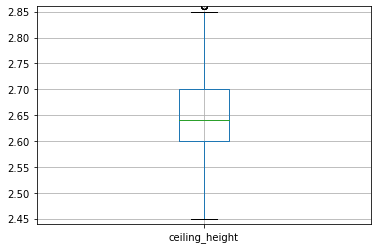

In [53]:
df.boxplot(column='ceiling_height')
plt.ylim(2.44, 2.86)


display(df['ceiling_height'].describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_new,%_living_area,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area,last_price2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0.472222,0.631667,51.0,120370,3,иное,0.231481,0.472222,13.000
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,20.4,0.631667,0.631667,100.4,408176,4,иное,0.128302,0.631447,64.900
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,6.5,0.714754,0.631667,43.6,88525,6,иное,0.106557,0.714754,5.400
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,12.0,0.628099,0.631667,76.0,117355,2,иное,0.099174,0.628099,14.200
5,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,...,12.0,0.600000,0.631667,48.0,76500,3,иное,0.150000,0.600000,6.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,6,28659000.0,245.4,2016-03-31,14,2.64,4,168.3,2,NaN,...,25.9,0.685819,0.648695,168.3,116785,3,иное,0.105542,0.685819,28.659
23692,14,19500000.0,309.7,2016-02-03,9,2.64,5,199.0,5,NaN,...,14.3,0.642557,0.628251,199.0,62964,2,последний этаж,0.046174,0.642557,19.500
23693,15,88000000.0,400.0,2019-03-27,9,2.50,2,250.0,1,NaN,...,50.0,0.625000,0.628251,250.0,220000,2,первый этаж,0.125000,0.625000,88.000
23696,6,32250000.0,374.6,2018-06-09,19,2.64,5,264.5,2,NaN,...,27.6,0.706086,0.706086,264.5,86092,5,иное,0.073679,0.706086,32.250


count    20748.000000
mean         2.626767
std          0.080622
min          2.450000
25%          2.600000
50%          2.640000
75%          2.640000
max          2.860000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

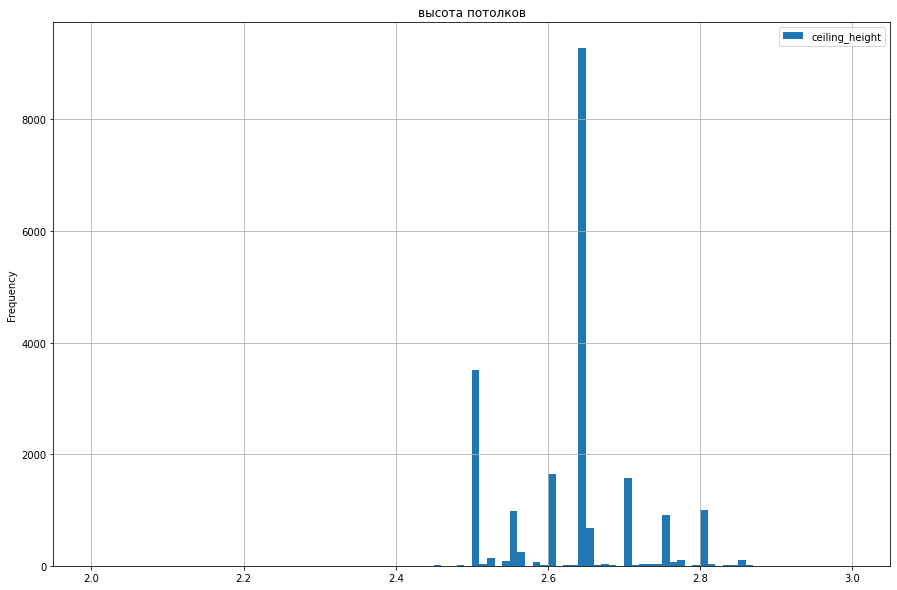

In [54]:
df_ceiling_height = df.query('ceiling_height >= 2.44 and ceiling_height <= 2.86') 
display(df_ceiling_height)
display(df_ceiling_height['ceiling_height'].describe())
df_ceiling_height.plot(kind = 'hist',y = 'ceiling_height', bins = 100, grid=True, range = (2,3), figsize = (15,10), title='высота потолков')

задание: "Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 
Также изучите зависимость от даты размещения: дня недели, месяца и года. 
"Выберите 10 населённых пунктов с наибольшим числом объявлений. 
Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "

Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 

,mean,count,median
total_area,,,
12.0,200000.000000,1,200000.0
13.0,180769.333333,3,142308.0
13.2,127727.000000,1,127727.0
14.0,85000.000000,1,85000.0
15.0,115000.000000,2,115000.0
...,...,...,...
590.0,110169.000000,1,110169.0
618.0,485437.000000,1,485437.0
631.0,221870.000000,1,221870.0


0.30196021420103947

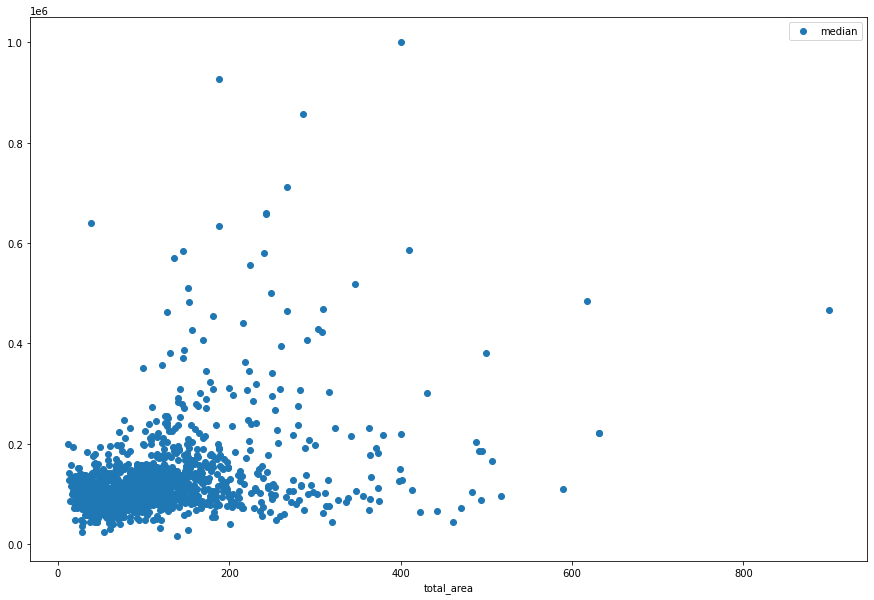

In [55]:
#зависит ли цена от квадратного метра
pivot_1m2_price = df.pivot_table(index = 'total_area', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_1m2_price)
pivot_1m2_price.columns = ['mean', 'count', 'median']
#display(pivot_1m2_price)
pivot_1m2_price.plot(y = 'median', style = 'o', figsize = (15,10))

pivot_1m2_price.sort_values('median', ascending = False)
display(pivot_1m2_price)

df['1m2_price'].corr(df['total_area']) #кореляция маленькая почти не зависит
#впринцепе большая часть цен за квадратный метр собрана в одном диапазоне видимо колеблется от других факторов

,mean,count,median
total_area,,,
12.0,200000.000000,1,200000.0
13.0,180769.333333,3,142308.0
13.2,127727.000000,1,127727.0
14.0,85000.000000,1,85000.0
15.0,115000.000000,2,115000.0
...,...,...,...
185.0,24324.000000,1,24324.0
190.0,16842.000000,1,16842.0
201.5,39206.000000,1,39206.0


0.30196021420103947

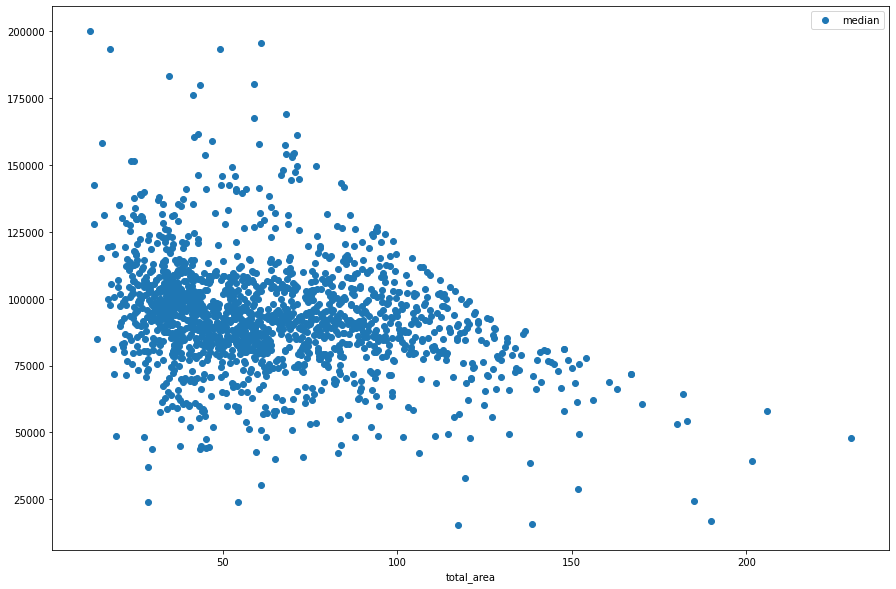

In [56]:
#НА ОСНОВАНИИ ОТБРОСАННЫХ УСОВ зависит ли цена от квадратного метра
pivot_1m2_price = df_last_price2.pivot_table(index = 'total_area', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_1m2_price)
pivot_1m2_price.columns = ['mean', 'count', 'median']
#display(pivot_1m2_price)
pivot_1m2_price.plot(y = 'median', style = 'o', figsize = (15,10))

pivot_1m2_price.sort_values('median', ascending = False)
display(pivot_1m2_price)

df['1m2_price'].corr(df['total_area']) 

,mean,count,median
rooms,,,
0,108513.121827,197,105556.0
1,100818.263701,8047,100000.0
2,95489.657305,7940,92796.5
3,97151.152907,5814,88983.0
4,110331.595763,1180,92667.0
5,126750.315951,326,96517.0
6,140718.847619,105,99412.0
7,163569.915254,59,108827.0
8,184651.083333,12,106760.0


0.05541965688109761

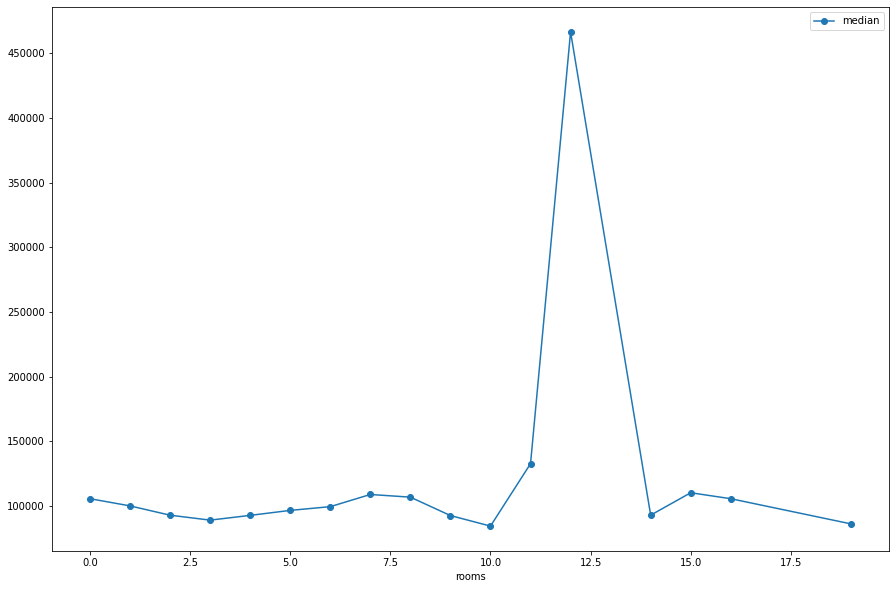

In [57]:
#зависит ли цена от числа комнат
pivot_rooms = df.pivot_table(index = 'rooms', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_rooms)
pivot_rooms.columns = ['mean', 'count', 'median']
#display(pivot_rooms)
pivot_rooms.plot(y = 'median', style='o-', figsize = (15,10))

pivot_rooms.sort_values('median', ascending = False)
display(pivot_rooms)

df['1m2_price'].corr(df['rooms'])#кореляция еще меньше чем с площадью - не зависит. 
#примерно одинаково держится цена.неадекватный скачек на 12 комнатах в одном обьявлении


,mean,count,median
rooms,,,
0,108513.121827,197,105556.0
1,100818.263701,8047,100000.0
2,95489.657305,7940,92796.5
3,97151.152907,5814,88983.0
4,110331.595763,1180,92667.0
5,126750.315951,326,96517.0
6,140718.847619,105,99412.0


0.05541965688109761

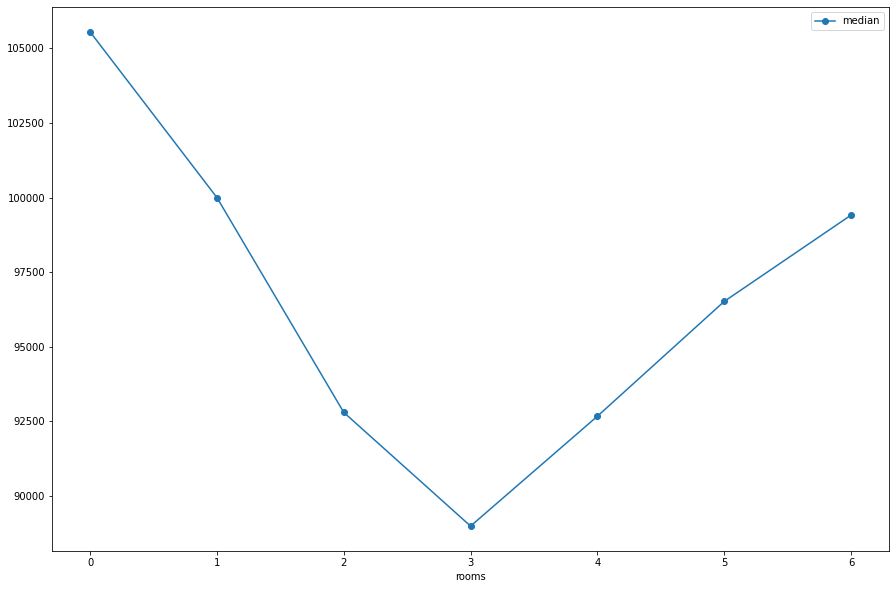

In [58]:
#НА ОСНОВАНИИ ОТБРОСАННЫХ УСОВ зависит ли цена от числа комнат
pivot_rooms = df_rooms.pivot_table(index = 'rooms', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_rooms)
pivot_rooms.columns = ['mean', 'count', 'median']
#display(pivot_rooms)
pivot_rooms.plot(y = 'median', style='o-', figsize = (15,10))

pivot_rooms.sort_values('median', ascending = False)
display(pivot_rooms)

df['1m2_price'].corr(df['rooms'])


,mean,count,median
floor_kategory,,,
иное,103468.218395,17363,98276
первый этаж,82308.790931,2889,81309
последний этаж,93381.210038,3447,87894


0.12906822939761473

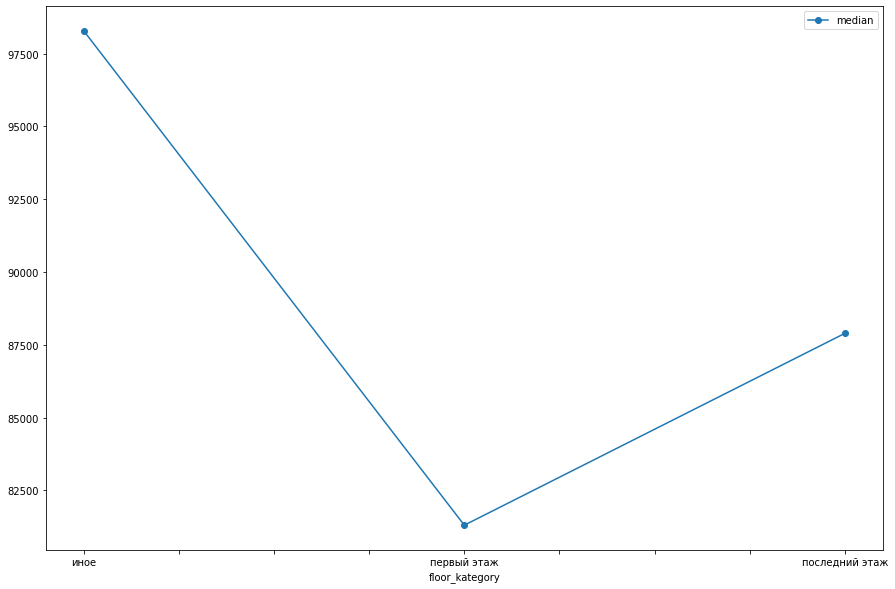

In [59]:
#зависит ли цена от этажа (первого или последнего)
pivot_floor = df.pivot_table(index = 'floor_kategory', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_floor)
pivot_floor.columns = ['mean', 'count', 'median']
#display(pivot_floor)
pivot_floor.plot(y = 'median', style='o-', figsize = (15,10))

pivot_floor.sort_values('median', ascending = False)
display(pivot_floor)

df['1m2_price'].corr(df['floor'])#кореляция еще меньше чем от площади, но больше чем от комнат.хотя вроде как должна зависеть. 
#первый этаж дешевле последних. т.е. чем выше тем дороже но опять же есть другие этажи чья стоимость больше значит они выигрывают не по этажам


-0.3179507915093032

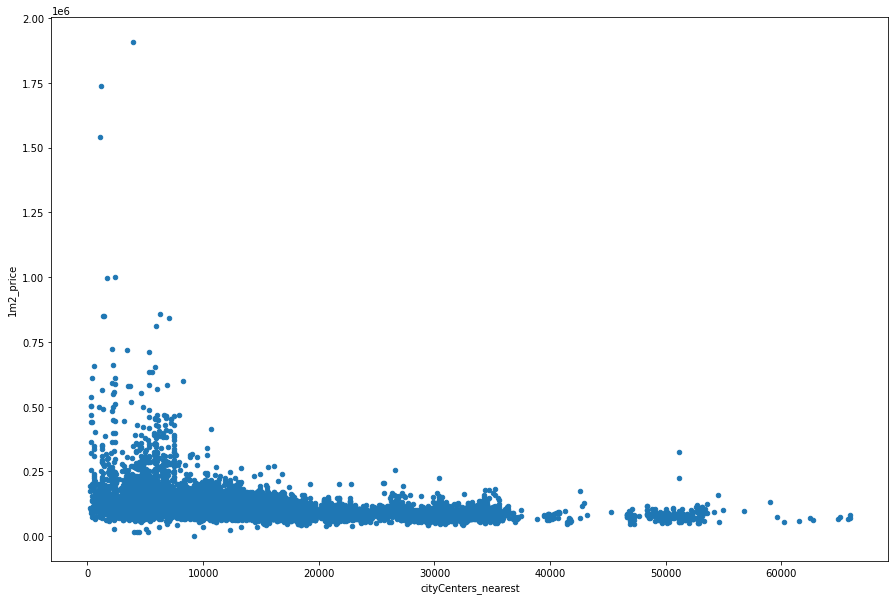

In [60]:
#зависит ли цена от удалённости от центра
df.plot(y = '1m2_price', x = 'cityCenters_nearest', kind='scatter', figsize = (15,10))
df['1m2_price'].corr(df['cityCenters_nearest']) # корелляция низкая хотя на графике чем ближе к нулю растояние, тем выше цены 


Также изучите зависимость от даты размещения: дня недели, месяца и года. (weekday month year)

,mean,count,median
weekday,,,
0,99438.427464,3612,94689.0
1,99734.536218,4183,95634.0
2,99617.185707,3974,95474.0
3,100162.898952,4295,95144.0
4,99012.139750,4000,94616.0
5,99018.177686,1936,93545.5
6,97708.381989,1699,94502.0


-0.007271457482763492

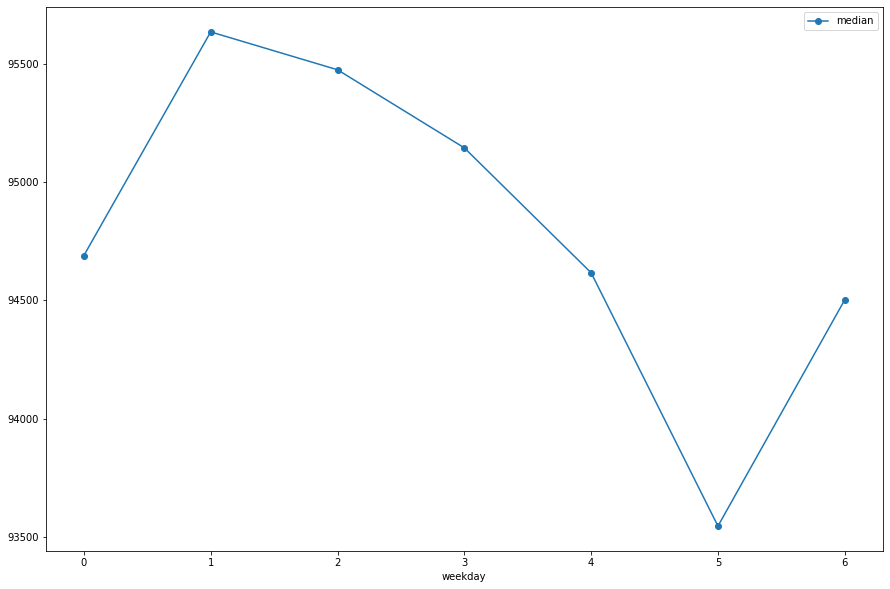

In [61]:
#день недели
pivot_weekday = df.pivot_table(index = 'weekday', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_weekday)
pivot_weekday.columns = ['mean', 'count', 'median']
#display(pivot_weekday)
pivot_weekday.plot(y = 'median', style='o-', figsize = (15,10))

pivot_weekday.sort_values('median', ascending = False)
display(pivot_weekday)

df['1m2_price'].corr(df['weekday']) #дороже всего по вторникам, дешево по субботам
#соответcnвие динамики активности работающего населения?

,mean,count,median
month,,,
1,99862.580667,1500,95222.5
2,98768.729545,2640,95000.0
3,98973.207576,2587,95238.0
4,101949.033207,2379,96452.0
5,98543.761381,1274,92857.0
6,97763.311364,1760,92799.5
7,99625.642478,1695,95000.0
8,100110.516628,1744,96026.5
9,100464.286219,1981,95607.0


-0.001995437113447435

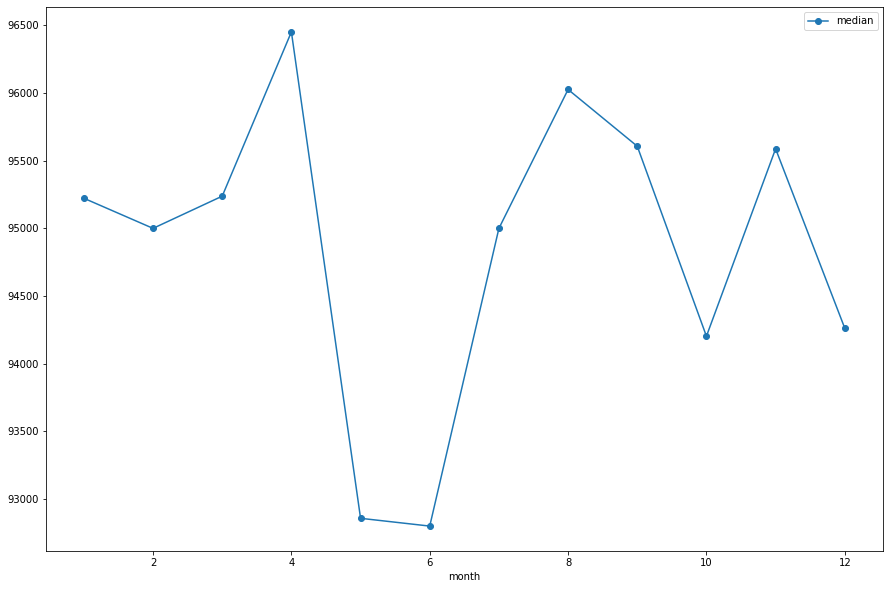

In [62]:
#месяц
pivot_month = df.pivot_table(index = 'month', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_month)
pivot_month.columns = ['mean', 'count', 'median']
#display(pivot_month)
pivot_month.plot(y = 'median', style='o-', figsize = (15,10))

pivot_month.sort_values('median', ascending = False)
display(pivot_month)

df['1m2_price'].corr(df['month']) # апрель повышение, с мая по июль провал, август повышение. сезон отпусков? 
#соответcnвие динамики активности работающего населения?

In [63]:
#месяц
#pivot_month = df.pivot_table(index = 'month', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_month)
#pivot_month.columns = ['mean', 'count', 'median']
#display(pivot_month)
#pivot_month.plot(y = 'mean', style='o-')

#pivot_month.sort_values('mean', ascending = False)
#display(pivot_month)

#df['1m2_price'].corr(df['month']) # апрель повышение, с мая по июль провал, август сентябрь повышение. 

,mean,count,median
year,,,
2014,124830.459854,137,107000
2015,104614.206549,1191,93415
2016,98322.341358,2783,91743
2017,97621.874847,8190,92565
2018,97773.557460,8519,95690
2019,107123.773532,2879,103306


0.008516056344522452

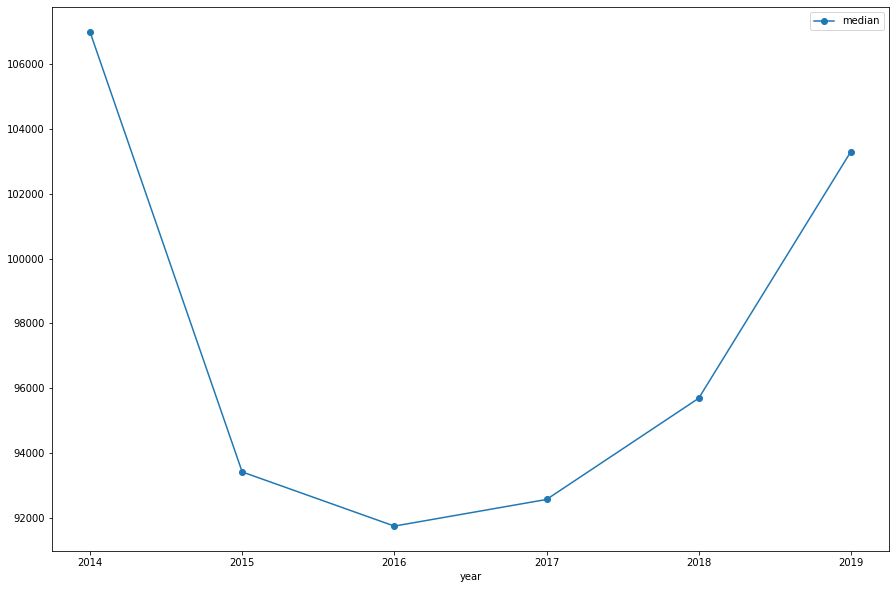

In [64]:
#год 
pivot_year = df.pivot_table(index = 'year', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(pivot_year)
pivot_year.columns = ['mean', 'count', 'median']
#display(pivot_year)
pivot_year.plot(y = 'median', style='o-', figsize = (15,10))

pivot_year.sort_values('median', ascending = False)
display(pivot_year)

df['1m2_price'].corr(df['year']) #максимальнное значение достигнуто в 2014 году далее спад до 2016 и медленный рост до 2019.
#к начальному максимуму так и не вернулось
#если почитать новости:
#2014 https://www.vedomosti.ru/economics/articles/2019/10/08/813068-20-let-stagnatsii
#Введение санкций против России и ответных санкций, девальвация рубля, переход ЦБ к режиму плавающего курса рубля. Начало рецессии

Выберите 10 населённых пунктов с наибольшим числом объявлений.
Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

In [65]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок', '')#если пооткидывать лишнее то ни с чем посторонним не суммируеться количетво тоже
df['locality_name'] = df['locality_name'].str.replace('деревня', '')
pivot_gorod = df.pivot_table(index = 'locality_name', values = '1m2_price', aggfunc=['count', 'mean'])
pivot_gorod.columns = ['count', 'mean']
pivot_gorod = pivot_gorod.sort_values('count', ascending = False)
display(pivot_gorod.head(10))

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.005788
Мурино,556,85681.758993
Шушары,440,78677.379545
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
Парголово,327,90175.886850
Гатчина,307,68746.110749
Кудрово,299,92473.588629


Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. " 

max Санкт-Петербург = 114849.005788

min Выборг = 58141.919831

In [66]:
pivot_gorod = pivot_gorod.sort_values('mean', ascending = False)
display(pivot_gorod.head(10))

,count,mean
locality_name,,
Зеленогорск,24,115122.750000
Санкт-Петербург,15721,114849.005788
Репино,4,104238.500000
Пушкин,369,103125.818428
Сестрорецк,183,101757.639344
Лисий Нос,3,100661.000000
Кудрово,173,100253.046243
Мистолово,11,98550.000000
Левашово,1,96998.000000


In [67]:
pivot_gorod = pivot_gorod.sort_values('mean')
display(pivot_gorod.head(10))

,count,mean
locality_name,,
Старополье,3,11206.333333
станции Свирь,2,11481.500000
Вахнова Кара,1,11688.000000
Выскатка,2,12335.500000
Совхозный,2,12629.500000
Малая Романовка,1,12725.000000
Тёсово-4,1,12931.000000
Сижно,1,13710.000000
Ям-Тесово,2,13711.500000


задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделите квартиры в Санкт-Петербурге (*'locality_name'*). 
Ваша задача — выяснить, какая область входит в центр. 
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
После этого посчитайте среднюю цену для каждого километра. 
Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
Определите границу, где график сильно меняется — это и будет центральная зона. "

1m2_price_count  1m2_price_mean  \
locality_name    cityCenters_nearest_km_dybl                                    
 Александровская 27.352                                     1               1   
                 27.584                                     1               1   
 Белоостров      38.868                                     1               1   
 Левашово        25.727                                     1               1   
 Лисий Нос       26.368                                     1               1   
                 28.226                                     1               1   
                 28.246                                     1               1   
 Металлострой    26.696                                     1               1   
                 26.702                                     1               1   
                 26.739                                     1               1   
                 26.766                                     1               1   
                 26.770                                     1               1   
                 26.800                                     1               1   
                 26.894                                     1               1   
                 26.954                                     1               1   
                 26.980                                     3               3   
                 27.102                                     4               4   
                 27.107                                     3               3   
                 27.243                                     2               2   
                 27.328                                     3               3   
                 27.358                                     2               2   
                 27.447                                     2               2   
                 27.470                                     2               2   
                 27.472                                     1               1   
                 27.482                                     1               1   
                 27.515                                     1               1   
                 27.585                                     1               1   
                 27.619                                     1               1   
                 27.629                                     2               2   
                 27.640                                     1               1   
                 27.692                                     1               1   
                 27.703                                     2               2   
                 27.710                                     2               2   
                 27.712                                     2               2   
                 27.742                                     1               1   
                 27.794                                     2               2   
                 27.803                                     1               1   
                 27.825                                     5               5   
                 27.917                                     1               1   
                 28.088                                     1               1   
                 28.132                                     1               1   
                 28.153                                     1               1   
                 28.258                                     2               2   
                 28.286                                     2               2   
                 28.386                                     1               1   
                 28.423                                     2               2   
                 28.441                                     1               1   
                 29.217                                     1               1

,1m2_price_mean,cityCenters_nearest_km_mean
locality_name,,
Сестрорецк,1.967742,34.758903
Санкт-Петербург,2.486109,10.778712
Пушкин,1.579399,28.573742
Петергоф,1.415493,35.259268
Павловск,1.310345,32.957759
Ломоносов,1.500000,51.059841
Кронштадт,1.397059,49.599574
Красное Село,1.629630,30.212750
Колпино,1.643902,31.966922


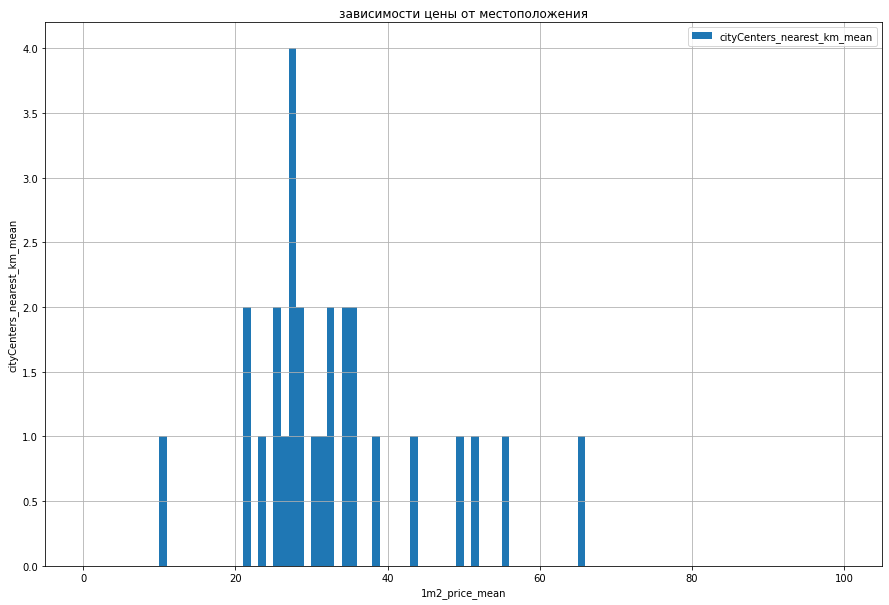

-0.4264655730072266

In [68]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km_dybl'] = df['cityCenters_nearest_km']*1
pivot_gorod2 = df.pivot_table(index = ['locality_name' , 'cityCenters_nearest_km_dybl'], values =['1m2_price', 'cityCenters_nearest_km'], aggfunc=['count', 'mean'])
pivot_gorod2.columns = ['1m2_price_count', '1m2_price_mean', 'cityCenters_nearest_km_count', 'cityCenters_nearest_km_mean' ]
display(pivot_gorod2.head(50))
pivot_gorod3 = pivot_gorod2.pivot_table(index = ['locality_name'], values =['1m2_price_mean', 'cityCenters_nearest_km_mean'], aggfunc=[ 'mean'])
pivot_gorod3.columns = ['1m2_price_mean', 'cityCenters_nearest_km_mean' ]
pivot_gorod3 = pivot_gorod3.sort_values('locality_name', ascending = False)
display(pivot_gorod3.head(50))

pivot_gorod3.plot(kind = 'hist',x = '1m2_price_mean',y = 'cityCenters_nearest_km_mean', bins = 100, grid=True, range = (0,100), figsize = (15,10))
plt.xlabel('1m2_price_mean'), plt.ylabel('cityCenters_nearest_km_mean')
plt.title('зависимости цены от местоположения')
plt.show()
pivot_gorod3['1m2_price_mean'].corr(pivot_gorod3['cityCenters_nearest_km_mean'])

<AxesSubplot:xlabel='locality_name'>

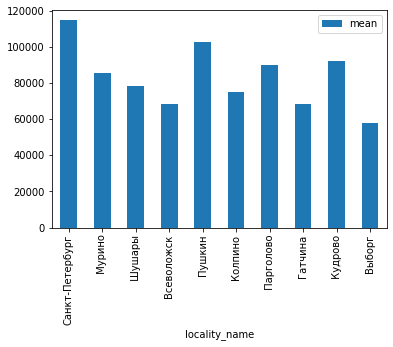

In [69]:
pivot_gorod.sort_values(by = 'count', ascending = False).head(10).plot(y='mean', kind = 'bar')

**Вывод**

После 8 км окончательное падение цен - думаю это и есть центр. на 3 километре есть какойто провал возможно по параметрам там маленькие стоимости из-за маленьких площадей или плохих условий. третий и восьмой километр схожи по стоимости.

,mean
cityCenters_nearest_km,
0,187324.151163
1,166603.741667
2,146662.820847
3,129416.336502
4,137475.502756
5,146979.224967
6,152277.895745
7,141399.724816
8,120581.335821


<AxesSubplot:xlabel='cityCenters_nearest_km'>

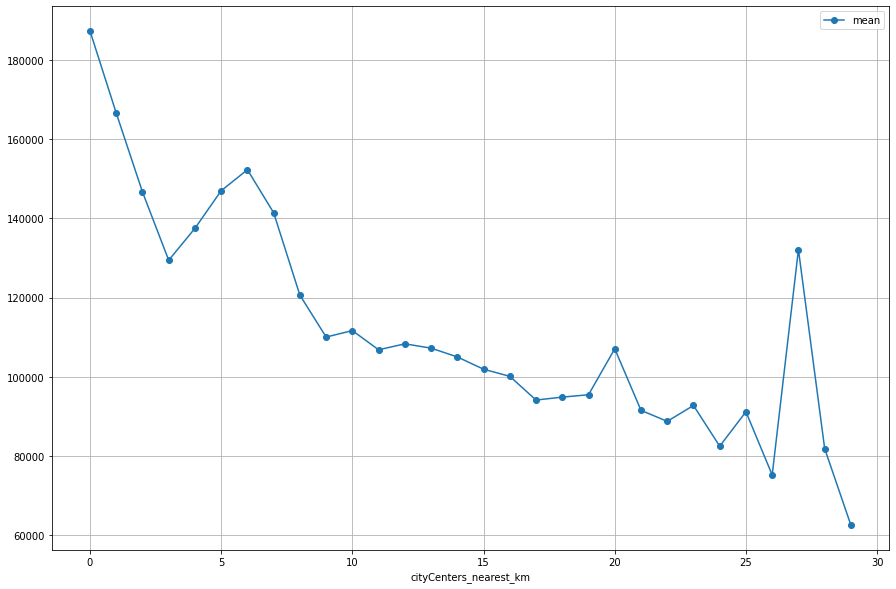

In [70]:

#cityCenters_nearest — расстояние до центра города (м)
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999999)# там где нет центра и расстояния до него
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
#pivot_gorod_centr_km = df.pivot_table(index = 'locality_name', values = ['cityCenters_nearest_km', '1m2_price'], aggfunc=['sum','mean'])
#pivot_gorod_centr_km.columns = ['sum','mean'] - ошибка 4 столбца
#pivot_gorod_centr_km = pivot_gorod_centr_km.sort_values('sum', ascending = False)- ошибка 4 столбца
#https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD_(%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3) 
#центрльный район Санкт-Петербурга =  17км² (по диагонали на карте 5 км примерно)

pivot_SPB_centr_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km < 999999999').pivot_table(index = 'cityCenters_nearest_km', values =  '1m2_price', aggfunc = 'mean')
pivot_SPB_centr_km.columns = ['mean']
display(pivot_SPB_centr_km)
# неадекватное значение 10000000000000000	156184.032787

#pivot_SPB_centr_km1 = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8').pivot_table(index = 'cityCenters_nearest_km', values =  '1m2_price', aggfunc = 'count')
#display(pivot_SPB_centr_km1.sum()) # 4382 (28%)объявления в центре города из 15660 
pivot_SPB_centr_km.plot(y = 'mean',  style='o-', grid=True, figsize = (15,10))

 задание: "Выделите сегмент квартир в центре. 
 Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
 Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
 Сделайте выводы. 
 Отличаются ли они от общих выводов по всему городу?"

In [71]:
SPB_centr = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8')
display(SPB_centr)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,median_%_living_area,living_area_new,1m2_price,weekday,floor_kategory,sootnos_kitchen_area,sootnos_living_area,last_price2,cityCenters_nearest_km,cityCenters_nearest_km_dybl
1,0,64900000.0,159.0,2015-07-24,3,2.64,14,NaN,9,NaN,...,0.631667,100.4,408176,4,иное,0.128302,0.631447,64.90,6,6.800
11,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.0,4,NaN,...,0.631667,38.0,279503,1,иное,0.310559,0.236025,45.00,6,6.589
13,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,NaN,...,0.631667,68.0,169492,1,иное,0.135593,0.576271,20.00,4,4.800
26,11,11700000.0,80.0,2014-12-10,3,2.64,5,55.1,3,NaN,...,0.631667,55.1,146250,2,иное,0.137500,0.688750,11.70,8,8.767
32,20,33000000.0,180.0,2017-02-17,3,2.90,9,86.0,8,False,...,0.631667,86.0,183333,4,иное,0.133333,0.477778,33.00,4,4.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,15,88000000.0,400.0,2019-03-27,9,2.50,2,250.0,1,NaN,...,0.628251,250.0,220000,2,первый этаж,0.125000,0.625000,88.00,2,2.725
23694,14,29000000.0,292.2,2017-01-12,9,3.35,5,225.9,4,NaN,...,0.628251,225.9,99247,3,иное,0.112594,0.773101,29.00,5,5.162
23696,6,32250000.0,374.6,2018-06-09,19,2.64,5,264.5,2,NaN,...,0.706086,264.5,86092,5,иное,0.073679,0.706086,32.25,3,3.574
23697,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,0.666667,180.0,105556,0,последний этаж,0.048148,0.666667,28.50,4,4.142


count    4382.000000
mean       88.570032
std        57.929565
min        12.000000
25%        53.225000
50%        75.000000
75%       104.840000
max       900.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

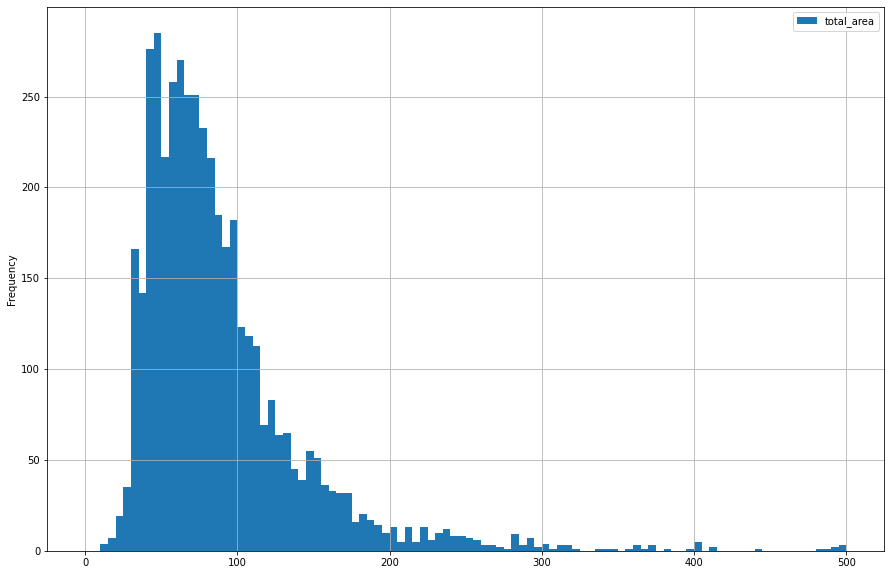

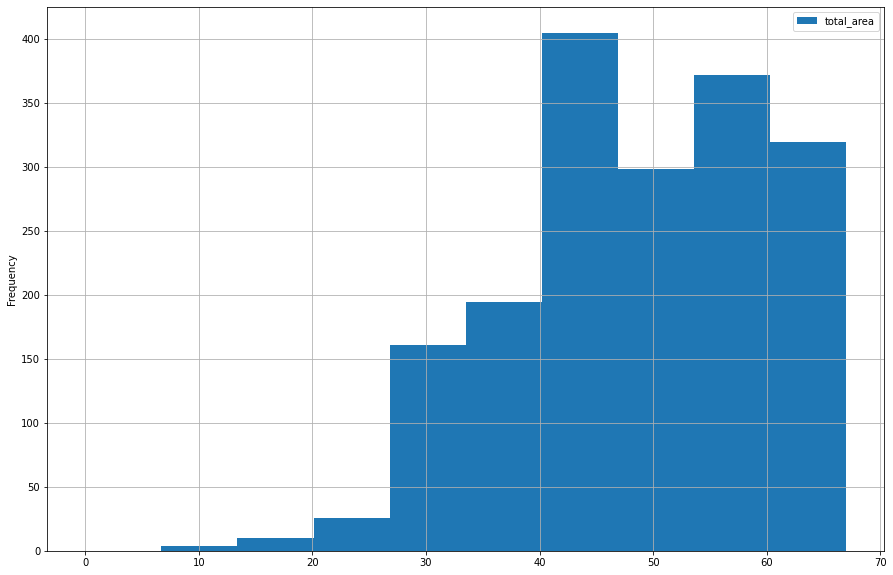

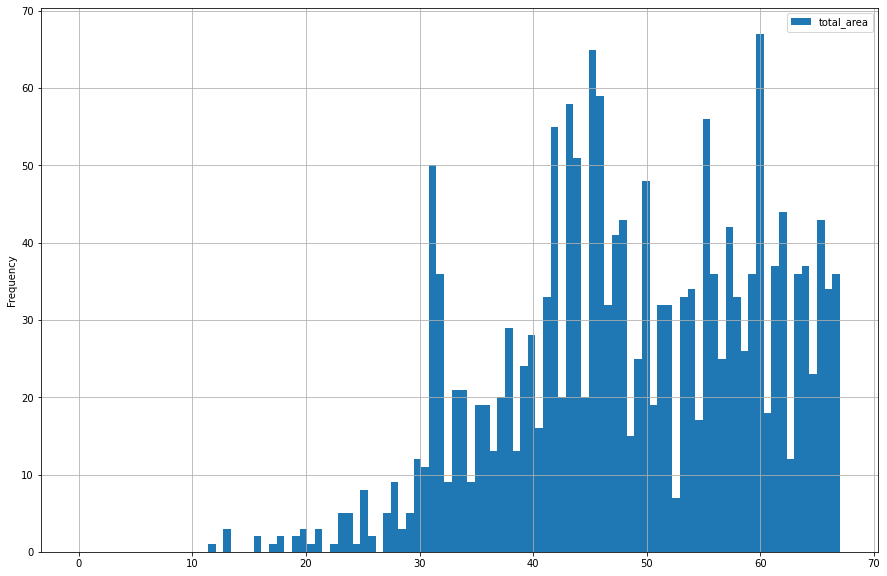

In [72]:
#Проанализируйте изучите : площадь
display(SPB_centr['total_area'].describe())

SPB_centr.plot(kind = 'hist',y = 'total_area', bins = 100, grid=True, range = (0,500), figsize = (15,10))
SPB_centr.plot(kind = 'hist',y = 'total_area', bins = 10, grid=True, range = (0,67), figsize = (15,10))
SPB_centr.plot(kind = 'hist',y = 'total_area', bins = 100, grid=True, range = (0,67), figsize = (15,10))

***Вывод***

Максимальное количество квартир в отметках 46 метров и 61. хотя основна доля квартир вообщем размером в пределах 40-46. смещение среднего происходит из-за выбросов "огромных" квартир. распределение на выборке схое с распределением в целом датасете.

count    4382.000000
mean       13.768752
std        22.961364
min         1.600000
25%         6.207104
50%         8.707500
75%        13.500000
max       763.000000
Name: last_price2, dtype: float64

<AxesSubplot:ylabel='Frequency'>

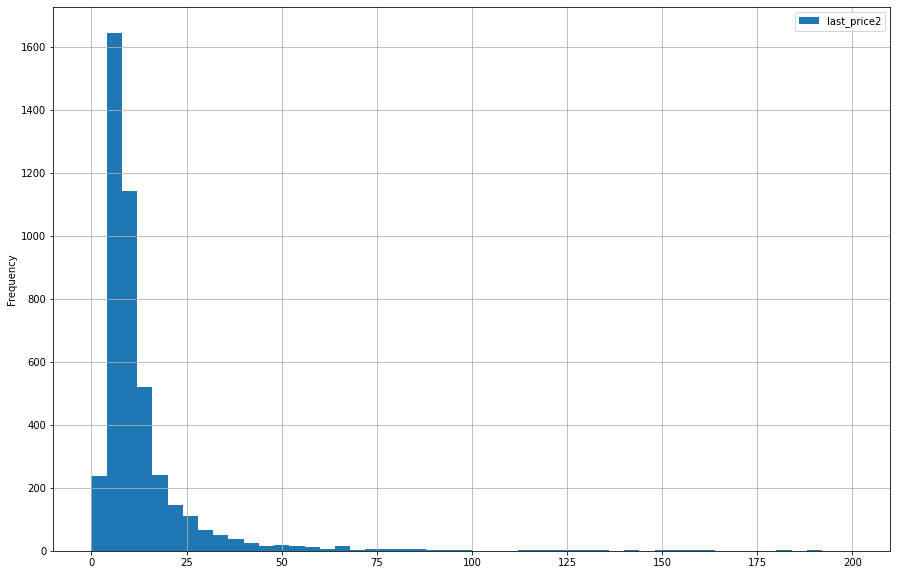

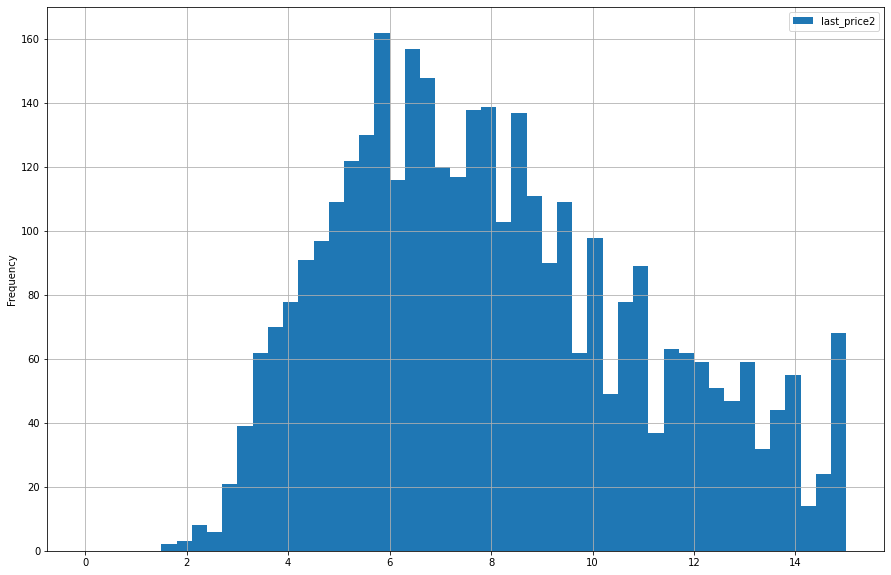

In [73]:
#Проанализируйте изучите : цена
display(SPB_centr['last_price2'].describe())
SPB_centr.plot(kind = 'hist',y = 'last_price2', bins = 50, grid=True, range = (0,200), figsize = (15,10))
SPB_centr.plot(kind = 'hist',y = 'last_price2', bins = 50, grid=True, range = (0,15), figsize = (15,10)) 

***Вывод***

В отличиие от всего датасета(3-5млн). в выборке по центр Питера стоимость квартир смещена в большую сторону от 5 до 9 млн 

count    4382.000000
mean        2.720904
std         1.410307
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

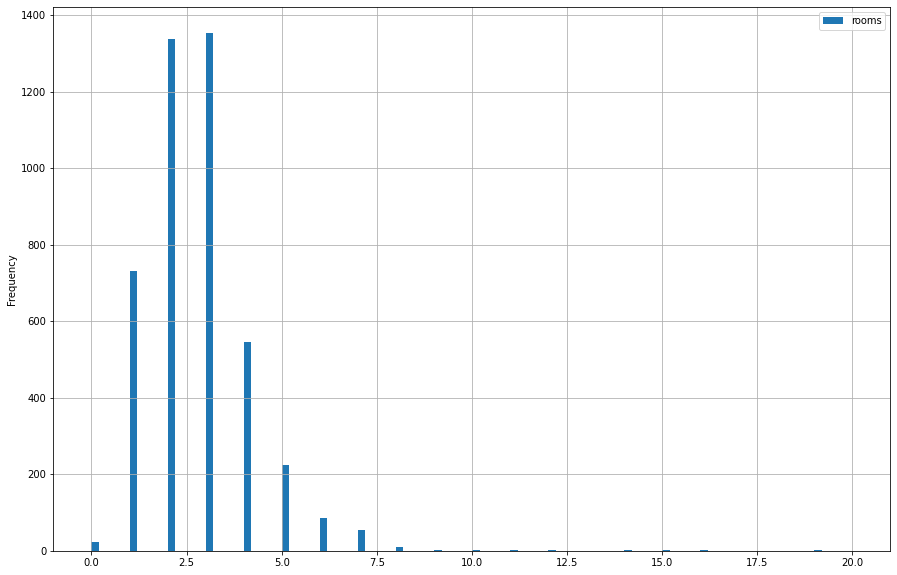

In [74]:
#Проанализируйте изучите : число комнат
display(SPB_centr['rooms'].describe())

SPB_centr.plot(kind = 'hist',y = 'rooms', bins = 100, grid=True, range = (0,20), figsize = (15,10))

***Вывод***

В отличиие от всего датасета где в основном 1, 2(наиболее), 3(наименее) комнаты. в центре Питера в основном 2 и 3 комнаты. однокомнатные наименее представлены

count    4382.000000
mean        2.947700
std         1.678525
min         2.000000
25%         2.640000
50%         2.755000
75%         3.100000
max       100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

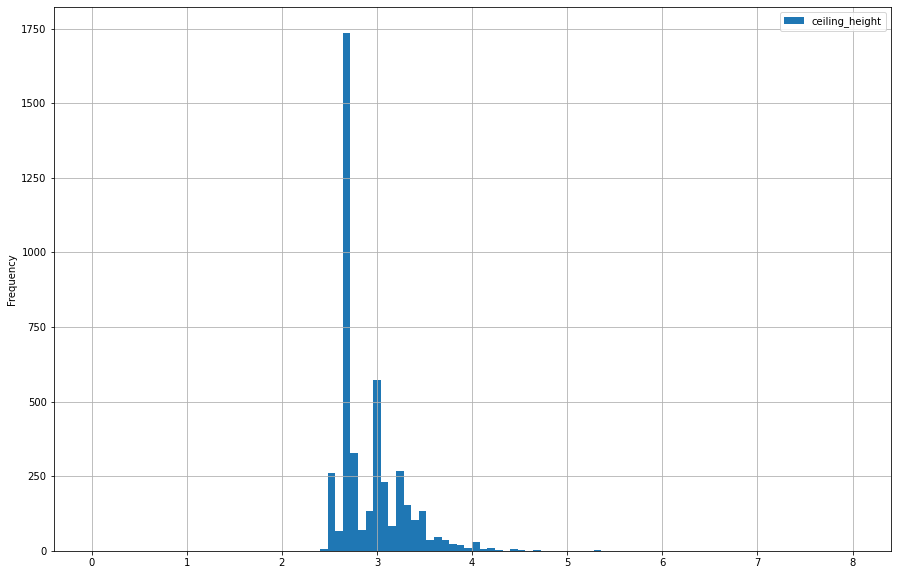

In [75]:
#Проанализируйте изучите : высота потолков
display(SPB_centr['ceiling_height'].describe())
SPB_centr.plot(kind = 'hist',y = 'ceiling_height', bins = 100, grid=True, range = (0,8), figsize = (15,10))


***Вывод***

В отличиие от всего датасета где потолки 2.5 метра. в центре Питера преобладают 3х метровые потолки.

,mean,count,median
rooms,,,
0,140257.347826,23,131250.0
1,145565.320109,731,135714.0
2,136733.720478,1338,123513.5
3,139505.661004,1354,116335.5
4,140066.786106,547,109900.0
5,144819.240000,225,104662.0
6,153309.127907,86,104248.5
7,167223.462963,54,109996.0
8,191784.181818,11,107333.0


0.020596530741433368

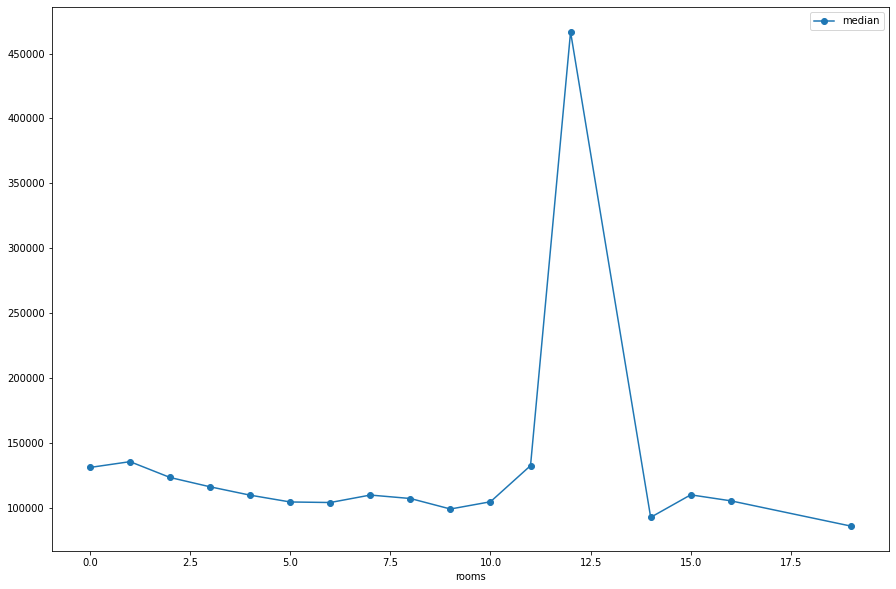

In [76]:
#Также выделите факторы, которые влияют на стоимость квартиры (число комнат)
SPB_centr_rooms = SPB_centr.pivot_table(index = 'rooms', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(SPB_centr_rooms)
SPB_centr_rooms.columns = ['mean', 'count', 'median']
#display(SPB_centr_rooms)
SPB_centr_rooms.plot(y = 'median', style='o-', figsize = (15,10))

SPB_centr_rooms.sort_values('median', ascending = False)
display(SPB_centr_rooms)

SPB_centr['1m2_price'].corr(SPB_centr['rooms']) #кореляция еще меньше чем с комнатами во всей выборке. 
#примерно одинаково держится цена. повторяется скачек как в общем датасете:12 комнат возможно тут какойто подвох с этим обьявлением - может золотые комнаты там?

,mean,count,median
floor_kategory,,,
иное,143525.410467,3172,125862.0
первый этаж,120248.057940,466,106670.5
последний этаж,141830.854839,744,115984.0


mean      count     median
                      total_area total_area total_area
floor_kategory rooms                                  
иное           0       54.943750         16      27.55
               1       43.678450        555      42.00
               2       65.071924        951      62.00
               3       94.457004        978      88.30
               4      124.175485        412     114.00
               5      169.055844        154     154.00
               6      199.583898         59     188.00
               7      249.755882         34     212.50
               8      253.260000          5     235.00
               9      263.600000          2     263.60
               10     216.100000          1     216.10
               11     194.100000          1     194.10
               14     304.200000          2     304.20
               15     590.000000          1     590.00
               19     374.600000          1     374.60
первый этаж    0       33.233333          6      23.30
               1       39.479906        106      36.00
               2       57.139939        164      54.45
               3       78.582906        117      75.00
               4      104.753514         37      96.00
               5      127.300000         23     120.50
               6      130.450000          6     129.00
               7      230.200000          4     192.90
               8      170.600000          2     170.60
               9      400.000000          1     400.00
последний этаж 0       71.000000          1      71.00
               1       40.061143         70      38.05
               2       62.473004        223      58.00
               3       93.158301        259      84.00
               4      131.489490         98     110.75
               5      190.050208         48     163.30
               6      232.928571         21     213.10
               7      291.256250         16     225.50
               8      288.950000          4     276.35
               10     290.000000          1     290.00
               11     183.700000          1     183.70
               12     900.000000          1     900.00
               16     270.000000          1     270.00

mean     count    median
                          1m2_price 1m2_price 1m2_price
floor_kategory rooms                                   
иное           0      151182.187500        16  138287.0
               1      148692.580180       555  138462.0
               2      141484.927445       951  128940.0
               3      143801.453988       978  120067.0
               4      142783.366505       412  110529.0
               5      139230.980519       154  104089.0
               6      145528.847458        59  100529.0
               7      134425.264706        34  108544.0
               8      181818.600000         5   94627.0
               9       85793.500000         2   85793.5
               10      71726.000000         1   71726.0
               11     170015.000000         1  170015.0
               14      92828.000000         2   92828.0
               15     110169.000000         1  110169.0
               19      86092.000000         1   86092.0
первый этаж    0      115251.833333         6  114758.0
               1      127448.981132       106  115801.5
               2      114715.652439       164  102532.0
               3      124488.410256       117   96423.0
               4      113020.513514        37   99415.0
               5      110696.913043        23  102140.0
               6      123856.000000         6  126273.5
               7      135417.000000         4  134445.0
               8      111694.500000         2  111694.5
               9      220000.000000         1  220000.0
последний этаж 0      115493.000000         1  115493.0
               1      148203.928571        70  137240.5
               2      132664.506726       223  115385.0
               3      130068.335907       259  110843.0
               4      138857.408163        98  111954.0
               5      179098.520833        48  126000.5
               6      183583.190476        21  125000.0
               7      244871.250000        16  111581.0
               8      244286.000000         4  129067.0
               10     137931.000000         1  137931.0
               11      95264.000000         1   95264.0
               12     466667.000000         1  466667.0
               16     105556.000000         1  105556.0

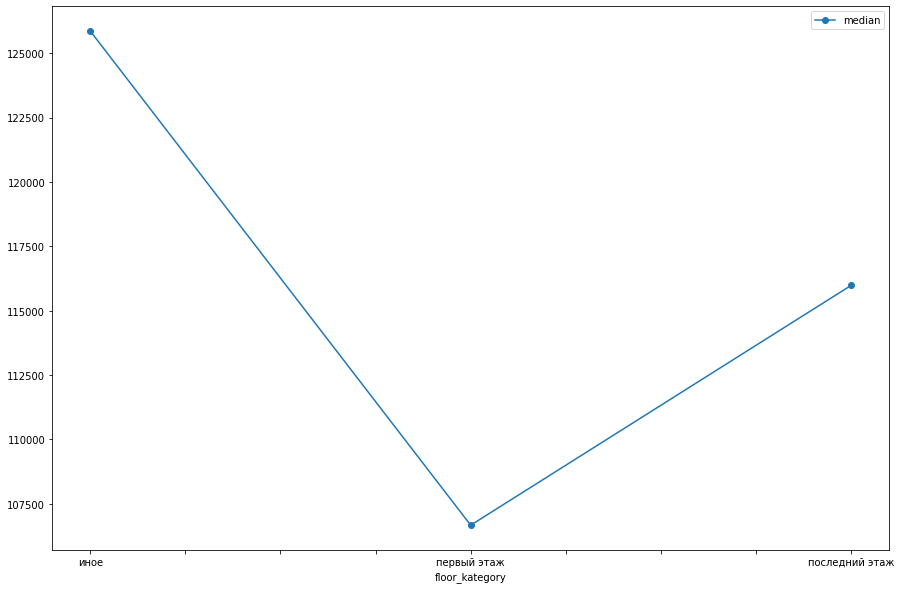

In [77]:
#Также выделите факторы, которые влияют на стоимость квартиры (этаж)
SPB_centr_floor = SPB_centr.pivot_table(index = 'floor_kategory', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(SPB_centr_floor)
SPB_centr_floor.columns = ['mean', 'count', 'median']
#display(SPB_centr_floor)
SPB_centr_floor.plot(y = 'median', style='o-', figsize = (15,10))

SPB_centr_floor.sort_values('median', ascending = False)
display(SPB_centr_floor)

SPB_centr['1m2_price'].corr(SPB_centr['floor'])#ситуация аналогична всему датасету. первые этажи дешевле последних. но иные этажи побеждают возможно т.к выигрывают по другим параметрам или есть более дорогостоящие варианты не на первых и не на последних этажах
display(SPB_centr.pivot_table(index = ['floor_kategory','rooms'], values = 'total_area', aggfunc = ['mean', 'count', 'median']))
display(SPB_centr.pivot_table(index = ['floor_kategory','rooms'], values = '1m2_price', aggfunc = ['mean', 'count', 'median']))

-0.08776210036689876

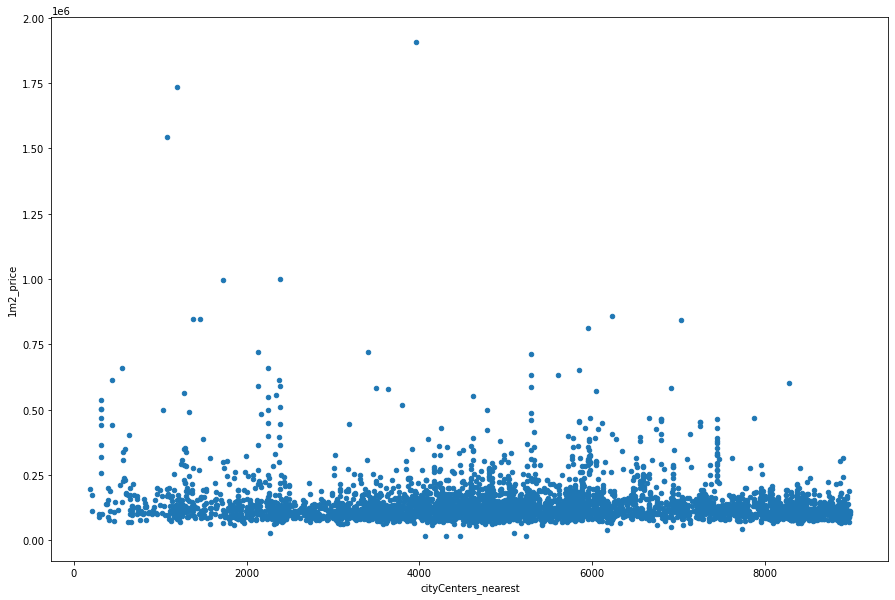

In [78]:
#Также выделите факторы, которые влияют на стоимость квартиры (удалённость от центра)
SPB_centr.plot(y = '1m2_price', x = 'cityCenters_nearest', kind='scatter', figsize = (15,10))
SPB_centr['1m2_price'].corr(SPB_centr['cityCenters_nearest']) # коэффицент корреляции отрицательный рост расстояния уменьшение цены.
#в данном случае нет такого активного скопления слева как в целом датасете. 

,mean,count,median
weekday,,,
0,141433.995468,662,123330.5
1,139859.800532,752,120102.0
2,139561.073529,748,122897.0
3,140225.424749,897,121351.0
4,138944.911924,738,122300.5
5,149387.478528,326,124755.5
6,141316.316602,259,125483.0


0.00862641284981652

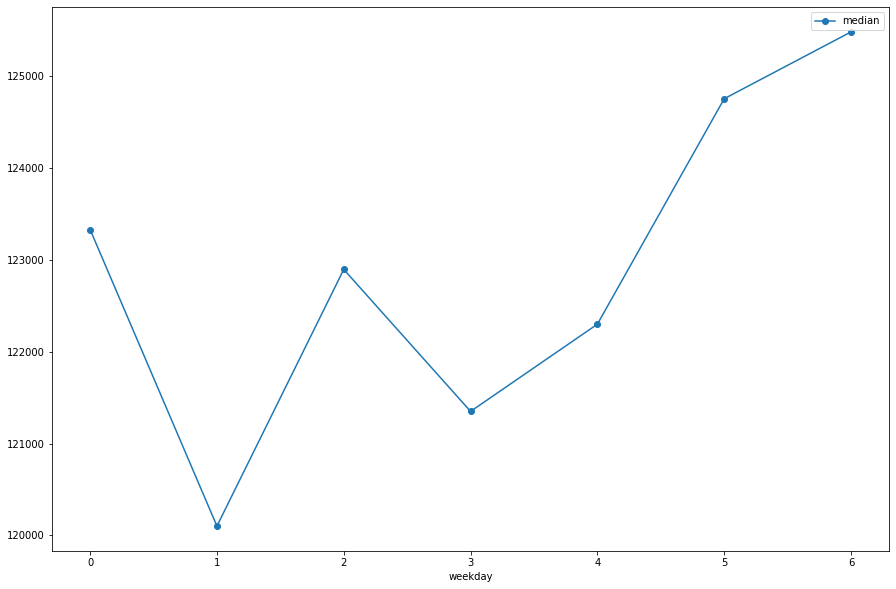

In [79]:
#Также выделите факторы, которые влияют на стоимость квартиры (дата размещения объявления) ДЕНЬ
SPB_centr_weekday = SPB_centr.pivot_table(index = 'weekday', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(SPB_centr_weekday)
SPB_centr_weekday.columns = ['mean', 'count', 'median']
#display(SPB_centr_weekday)
SPB_centr_weekday.plot(y = 'median', style='o-', figsize = (15,10))

SPB_centr_weekday.sort_values('median', ascending = False)
display(SPB_centr_weekday)

SPB_centr['1m2_price'].corr(SPB_centr['weekday'])

#в отличие от всего датасета в центре питера наоборот самые дорогие объявления по воскресеньям и резкий спад к вторнику.падение цен с среды на четверг присутвует в обоих наборах данных. 

,mean,count,median
month,,,
1,141893.778598,271,126966.0
2,140404.943478,460,120746.5
3,142074.618644,472,129373.0
4,149123.729469,414,122757.0
5,135570.437984,258,125112.5
6,140120.761765,340,116686.0
7,140475.883523,352,119546.0
8,141595.563077,325,125000.0
9,139280.865979,388,122449.0


-0.013912067967356664

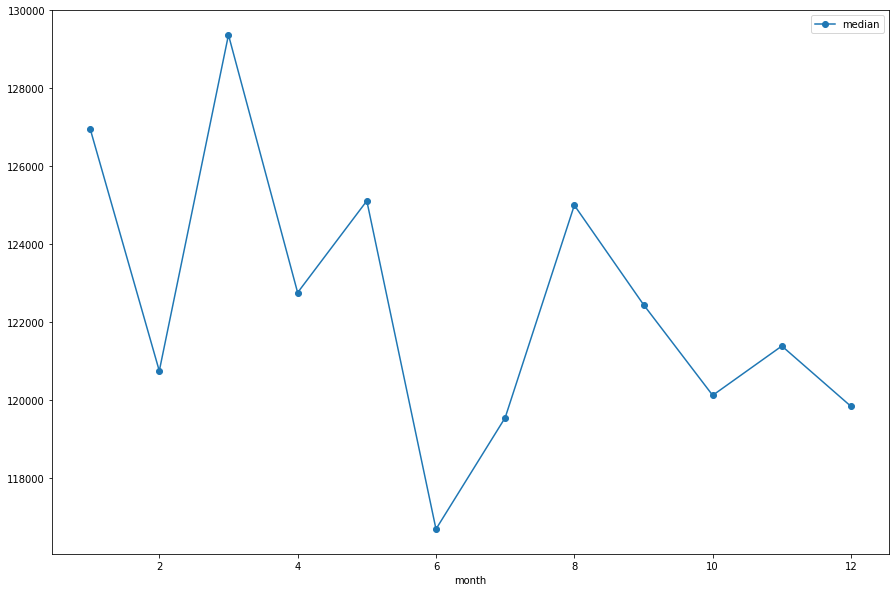

In [80]:
#Также выделите факторы, которые влияют на стоимость квартиры (дата размещения объявления) МЕСЯЦ
SPB_centr_month = SPB_centr.pivot_table(index = 'month', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(SPB_centr_month)
SPB_centr_month.columns = ['mean', 'count', 'median']
#display(SPB_centr_month)
SPB_centr_month.plot(y = 'median', style='o-', figsize = (15,10))

SPB_centr_month.sort_values('median', ascending = False)
display(SPB_centr_month)

SPB_centr['1m2_price'].corr(SPB_centr['month'])

# аналогичный сильный спад в 6 месяце. рост весной более смещен к марту чем к апрелю (как в целом датасете) есть рост в пятом месяце
#осенние месяци более плавны. рост в 11 месяце менее выражен чем в целом датасете.

,mean,count,median
year,,,
2014,179151.526316,38,141885.5
2015,142285.377717,368,119912.0
2016,141634.624365,591,119048.0
2017,138519.160438,1552,119383.5
2018,136996.406088,1347,123110.0
2019,153147.360082,486,133333.0


0.002247633994218738

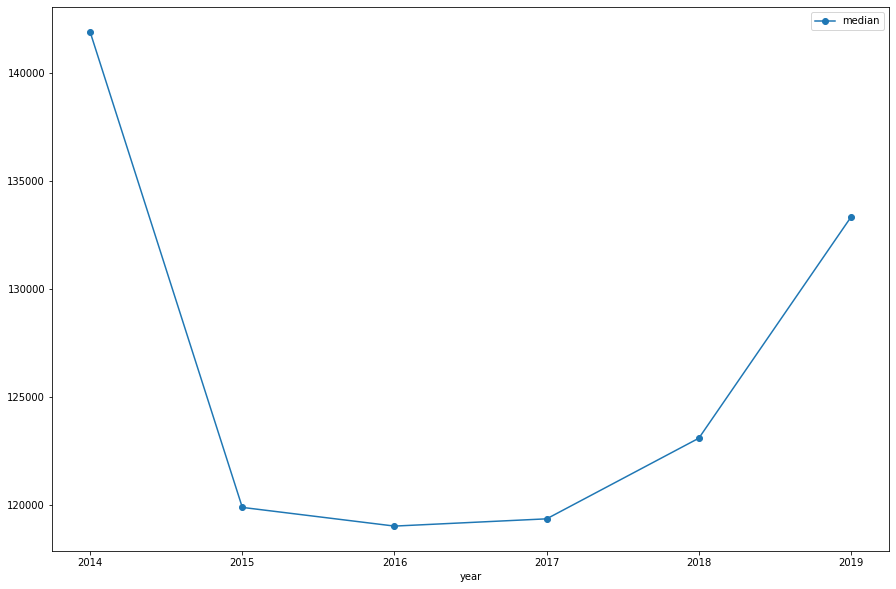

In [81]:
#Также выделите факторы, которые влияют на стоимость квартиры (дата размещения объявления) ГОД
SPB_centr_year = SPB_centr.pivot_table(index = 'year', values = '1m2_price', aggfunc = ['mean', 'count', 'median'])
#display(SPB_centr_year)
SPB_centr_year.columns = ['mean', 'count', 'median']
#display(SPB_centr_year)
SPB_centr_year.plot(y = 'median', style='o-', figsize = (15,10))

SPB_centr_year.sort_values('median', ascending = False)
display(SPB_centr_year)

SPB_centr['1m2_price'].corr(SPB_centr['year'])
#ситуация в выборке аналогична ситуации в датасетет целиком 

## Общий вывод

По всем рассмотренным выше параметрам есть неадекватные выбивающиеся из общей массы значения(площадь, цена, число комнат, всплески дат закрытий обьявлений).
Медиана времени продажи после чистки данных стала 111 вместо 94, тогда как среднее стало 198 вместо 185. 
До 111 дней сверхбыстрые, от 111 дней до 260 дней в пределах возможного. От 260 до 590 долгие. Если более 600 дней далее можно считать продажу затяжной, а обьявление с низким спросом. 
Вероятно что этаж все таки влияет на стоимость за квадратный метр и абсолютно точно на это влияет близость к центру. День и месяц публкации объявления тоже влияют на стоимость, возможно из-за разници спроса.
Год размещения обьявления отражает общее состояние рынка в целом(в нашем случае упадок с 2014)
Разница по ценам за квадратный метр общего датасета к выборки по центру Питера наблюдается если смотреть в разрезе месяцев и дней публикации. В остальном в них наблюдается схожее поведение.



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод